# NASA Meteorite Landings Analysis


🔍 This project focuses on analyzing global meteorite landings recorded over time. The goal is to explore temporal, geographical, and mass-based patterns in meteorite occurrences using structured data. By creating new columns and enriching the dataset, we aim to uncover historical trends, identify high-impact regions, and evaluate the distribution and classification of meteorites worldwide. This is a pure data analysis project — no machine learning involved — with insights drawn through visualizations, statistical summaries, and derived features.


# Data Overview

## Import Libraries

In [1]:
# Import pandas for data handling
import pandas as pd

# Import numpy for numerical operations
import numpy as np

#Import matplotlib for visualisation
import matplotlib.pyplot as plt

# Import seaborn for advance visualisation
import seaborn as sns

import warnings
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Load the Dataset
df=pd.read_csv("meteorite-landings.csv")
# Show the number of rows and columns
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 45716 rows and 10 columns.


In [3]:
df.shape

(45716, 10)

### Inference from `df.shape` Output (45716, 10)

1.  **Dataset Size**:
    * The dataset contains **45,716 rows**, indicating there are 45,716 observations or records.

2.  **Number of Features**:
    * There are **10 columns**, representing 10 variables or features in the dataset.

3.  **Implications**:
    * The dataset is considerably large, which can be beneficial for robust statistical analysis and machine learning models, but may also require more computational resources and time for processing.
    * The 10 features suggest a well-defined dataset, which can be effectively used for various analytical tasks. However, it's always good practice to check for potential correlations or irrelevance among features.

In [4]:
# Show all column names
print(df.columns.tolist())

['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation']


### Inference from `df.columns.tolist()` Output

1.  **Number of Columns**:
    * The dataset contains **10 columns**, confirming the dimensionality observed from `df.shape`.

2.  **Column Names and Potential Meanings**:
    * `name`: Likely the official name given to the meteorite.
    * `id`: A unique identifier for each meteorite record, useful for distinct identification.
    * `nametype`: Indicates the classification of the name, possibly whether it's a valid name or a historical entry.
    * `recclass`: Refers to the meteorite's classification (e.g., H5, L6, stony iron), crucial for geological analysis.
    * `mass`: Represents the mass of the meteorite, likely in grams, a key quantitative feature.
    * `fall`: Categorical variable indicating if the meteorite fall was observed ('Found' or 'Fell').
    * `year`: The year the meteorite was found or observed to fall. This will be a key temporal feature.
    * `reclat`: Latitude of the recovery or fall location.
    * `reclong`: Longitude of the recovery or fall location.
    * `GeoLocation`: A combined string representation of the geographical coordinates, often useful for direct mapping or quick reference.

3.  **Implications for Data Analysis**:
    * The column names are descriptive and provide clear insights into the nature of the data, which appears to be focused on meteorite landings.
    * The presence of `reclat`, `reclong`, and `GeoLocation` suggests that geographical analysis (e.g., plotting meteorite landing sites on a map) will be a significant part of the exploration.
    * `mass` and `year` are numerical features suitable for quantitative analysis, trend identification, and statistical modeling.
    * `recclass`, `fall`, and `nametype` are categorical features that can be used for grouping, filtering, and understanding distribution patterns.
    * `id` can serve as an index or key for data manipulation.
    * The dataset seems well-suited for a comprehensive study of meteorite characteristics, distribution, and temporal trends.

In [5]:
# Preview the dataset
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


### Inference from `df.head()` Output

1.  **Data Structure and Content Preview**:
    * The output displays the first 5 rows and all 10 columns of the dataset, providing a quick overview of the data structure and content.

2.  **Column Observations**:
    * **`name` (e.g., 'Aachen', 'Aarhus')**: Contains unique identifiers/names for each meteorite, appearing as string type.
    * **`id` (e.g., 1, 2, 6)**: Unique numerical identifier for each meteorite.
    * **`nametype` (e.g., 'Valid')**: Appears to be a categorical variable, with 'Valid' being a common entry, suggesting a status or type of naming.
    * **`recclass` (e.g., 'L5', 'H6', 'EH4')**: Represents the meteorite classification, a categorical variable crucial for scientific categorization.
    * **`mass` (e.g., 21.0, 720.0, 107000.0)**: Numerical values representing the mass, likely in grams, indicating a wide range of masses. This column is of float type.
    * **`fall` (e.g., 'Fell')**: A categorical variable indicating whether the meteorite fall was observed ('Fell') or if it was found later (presumably 'Found', though not shown in this preview).
    * **`year` (e.g., 1880.0, 1951.0)**: Numerical values representing the year of fall or discovery. Appears as float type, which might need conversion to integer or datetime if only the year number is needed.
    * **`reclat` (e.g., 50.77500, 56.18333)**: Numerical values for the latitude of the recovery location, in float format.
    * **`reclong` (e.g., 6.08333, 10.23333)**: Numerical values for the longitude of the recovery location, in float format. Some values are negative, which is expected for longitudes.
    * **`GeoLocation` (e.g., '(50.775000, 6.083330)')**: A string representation of the latitude and longitude, enclosed in parentheses. This column appears to be derived from `reclat` and `reclong` and might be redundant for numerical operations but useful for display or specific parsing.

3.  **Implications for Data Analysis**:
    * The preview confirms that the dataset contains a mix of numerical and categorical data types, which will require appropriate handling during analysis.
    * The `mass` column shows a wide range of values, suggesting potential skewness or the need for scaling/transformation in some machine learning models.
    * The `year` column as a float might require type conversion to integer if only the year number is relevant, or to a datetime object for time-series analysis.
    * The `GeoLocation` column, being a string, will need parsing if the individual `reclat` and `reclong` values are not sufficient or if a combined geographical point is needed as a single object. It also highlights potential redundancy with `reclat` and `reclong`.
    * Data quality checks will be important, especially for `mass` (e.g., zero or negative mass values) and geographical coordinates (valid ranges).
    * The `fall` column's values being 'Fell' indicates a need to check for other possible categories (e.g., 'Found') to understand the distribution of meteorite types.

In [6]:
df.tail()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.983330, -115.683330)"


### Inference from `df.tail()` Output

1.  **Data Structure and Content Preview (End of Dataset)**:
    * The output displays the last 5 rows and all 10 columns of the dataset, providing insights into the records at the end of the DataFrame.

2.  **Column Observations (Consistency and New Insights)**:
    * **`name`, `id`, `nametype`, `reclat`, `reclong`, `GeoLocation`**: The data types and general format for these columns remain consistent with the observations from `df.head()`. `nametype` continues to show 'Valid'.
    * **`recclass` (e.g., 'Eucrite', 'Pallasite, ungrouped', 'H4', 'L6', 'L3.7')**: This provides further evidence of the diversity in meteorite classifications present in the dataset. The specific values indicate various types of meteorites.
    * **`mass` (e.g., 172.0, 46.0, 3.3, 2167.0, 200.0)**: Continues to show numerical values with varying magnitudes, reinforcing the need to consider the distribution of this feature.
    * **`fall` (e.g., 'Found')**: Crucially, this output explicitly shows the 'Found' category for the `fall` column, confirming that meteorites are recorded as either 'Fell' (observed fall) or 'Found' (discovered later). This is an important categorical distinction.
    * **`year` (e.g., 1990.0, 1999.0, 1939.0, 2003.0, 1976.0)**: Shows a range of years, including more recent entries (e.g., 2003), indicating that the dataset covers a broad temporal span of meteorite discoveries or falls.

3.  **Implications for Data Analysis**:
    * The `df.tail()` output confirms the consistency of data types and formats across the dataset.
    * The presence of both 'Fell' and 'Found' in the `fall` column confirms it as a binary or categorical variable, which can be used to analyze differences between observed falls and found meteorites.
    * The diverse values in `recclass` highlight its importance for categorization and potentially for understanding the composition or origin of meteorites.
    * The range of `year` values allows for time-series analysis, enabling the exploration of trends in meteorite discoveries over time.
    * Overall, examining both `head()` and `tail()` provides a more complete picture of the data's range and consistency, helping to identify potential data cleaning or transformation needs before in-depth analysis.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


### Inference from `df.info()` Output

1.  **Dataset Overview**:
    * The DataFrame contains **45,716 entries** (rows), indexed from 0 to 45715, which is consistent with the `df.shape` output.
    * There are **10 columns** in total, as previously identified.

2.  **Column Data Types and Non-Null Counts**:
    * **`name` (object)**: All 45,716 entries are non-null. This column is suitable for direct use as a string identifier.
    * **`id` (int64)**: All 45,716 entries are non-null. This column is an integer type, suitable for unique identification.
    * **`nametype` (object)**: All 45,716 entries are non-null. This column is categorical and complete.
    * **`recclass` (object)**: All 45,716 entries are non-null. This column is categorical and complete.
    * **`mass` (float64)**: 45,585 non-null entries. There are **131 missing values** (45716 - 45585). This column is numerical.
    * **`fall` (object)**: All 45,716 entries are non-null. This column is categorical and complete.
    * **`year` (float64)**: 45,428 non-null entries. There are **288 missing values** (45716 - 45428). This column is numerical.
    * **`reclat` (float64)**: 38,401 non-null entries. There are **7,315 missing values** (45716 - 38401). This column is numerical, representing latitude.
    * **`reclong` (float64)**: 38,401 non-null entries. There are **7,315 missing values** (45716 - 38401). This column is numerical, representing longitude.
    * **`GeoLocation` (object)**: 38,401 non-null entries. There are **7,315 missing values** (45716 - 38401). This column is a string representation of geographical coordinates and has the same number of missing values as `reclat` and `reclong`, suggesting a direct relationship.

3.  **Data Types Summary**:
    * **`float64`**: 4 columns (`mass`, `year`, `reclat`, `reclong`)
    * **`int64`**: 1 column (`id`)
    * **`object`**: 5 columns (`name`, `nametype`, `recclass`, `fall`, `GeoLocation`)

4.  **Memory Usage**:
    * The DataFrame consumes approximately **3.5+ MB** of memory, which is a manageable size for standard data processing.

5.  **Implications for Data Cleaning and Analysis**:
    * **Missing Values**: The presence of missing values in `mass`, `year`, `reclat`, `reclong`, and `GeoLocation` requires attention.
        * For numerical columns (`mass`, `year`, `reclat`, `reclong`), strategies like imputation (mean, median, mode) or dropping rows/columns will need to be considered.
        * The significant number of missing values in geographical columns (`reclat`, `reclong`, `GeoLocation`) (approximately 16% of the data) is a critical point. Depending on the analysis, these rows might be dropped for geographical studies or the missing values handled appropriately.
    * **Data Types**:
        * `year` is currently `float64` but represents a year. It might be beneficial to convert it to an integer type to save memory and ensure correct handling of year values, assuming no fractional years are meaningful.
        * `GeoLocation` is an `object` (string). If precise geographical computations are needed, parsing this string into separate latitude and longitude numerical columns (or verifying `reclat` and `reclong` are sufficient) is necessary. The fact that it has the same missing values as `reclat` and `reclong` implies they are linked.
    * Overall, the `df.info()` output is crucial for planning the next steps in data preprocessing, particularly in handling missing data and ensuring appropriate data types for analysis.

# Data Preprocessing

## Null Value Handling

In [8]:
print(df.columns.tolist())

['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation']


In [9]:
# Drop rows where 'mass' or 'year' is null
df = df.dropna(subset=['mass', 'year'])

# Check new shape
print(f"After dropping rows with nulls in 'mass' and 'year': {df.shape}")


After dropping rows with nulls in 'mass' and 'year': (45311, 10)


### Inference from `df.dropna(subset=['mass', 'year'])` Output

1.  **Action Performed**:
    * Rows containing null values in either the 'mass' or 'year' columns have been removed from the dataset.

2.  **Impact on Dataset Size**:
    * The original dataset had 45,716 rows.
    * After dropping the specified rows, the dataset now contains **45,311 rows**.
    * This means **405 rows** ($45716 - 45311$) were removed due to missing values in either 'mass' or 'year'.

3.  **Implications for Data Analysis**:
    * **Data Quality Improvement**: Removing rows with missing `mass` or `year` values improves the data quality for analyses involving these crucial numerical attributes. This ensures that calculations, aggregations, and models using these columns will operate on complete data points.
    * **Impact on Sample Size**: While 405 rows were dropped, the dataset still retains a substantial 45,311 records. This indicates that a significant portion of the data remains available for robust analysis, and the removal of these rows is unlikely to severely impact the representativeness of the dataset, especially if the missingness was random.
    * **Readiness for Numerical Analysis**: The `mass` and `year` columns are now free from nulls, making them immediately ready for statistical calculations, trend analysis, and numerical modeling without requiring further imputation for these specific columns.

In [10]:
# Impute missing values with median
df['reclat'].fillna(df['reclat'].median(), inplace=True)
df['reclong'].fillna(df['reclong'].median(), inplace=True)

# Rebuild GeoLocation column based on updated reclat and reclong
df['GeoLocation'] = list(zip(df['reclat'], df['reclong']))

# Confirm that all null values are handled
print(df.isnull().sum())


name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64


# TypeCasting Columns

In [11]:
# Convert 'year' from float to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

# Check if it's converted properly
print(df.dtypes['year'])


datetime64[ns]


# Feature Engineering

In [12]:
df['year_only'] = df['year'].dt.year
df['decade'] = (df['year_only'] // 10) * 10
df['century'] = (df['year_only'] // 100 + 1).astype('Int64')


In [13]:
df['hemisphere_lat'] = df['reclat'].apply(lambda x: 'Northern' if x >= 0 else 'Southern')
df['hemisphere_long'] = df['reclong'].apply(lambda x: 'Eastern' if x >= 0 else 'Western')


In [14]:
mass_bins = [-np.inf, 100, 1000, 10000, 100000, np.inf]
mass_labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']
df['mass_category'] = pd.cut(df['mass'], bins=mass_bins, labels=mass_labels)
print("\nMass Category Distribution:")
print(df['mass_category'].value_counts())



Mass Category Distribution:
mass_category
Tiny      30100
Small     10441
Medium     3427
Large      1067
Huge        276
Name: count, dtype: int64


In [15]:
top_classes = df['recclass'].value_counts().nlargest(10).index
df['recclass_grouped'] = df['recclass'].apply(lambda x: x if x in top_classes else 'Other')
print("\nTop 10 Recclass Grouped (including 'Other'):")
print(df['recclass_grouped'].value_counts())



Top 10 Recclass Grouped (including 'Other'):
recclass_grouped
Other    9667
L6       8234
H5       7102
L5       4755
H6       4516
H4       4185
LL5      2761
LL6      2037
L4       1216
H4/5      425
CM2       413
Name: count, dtype: int64


### Inference from `recclass_grouped` Output

1.  **Action Performed**:
    * The `recclass` column has been grouped into a new column called `recclass_grouped`.
    * This grouping identifies the **top 10 most frequent meteorite classifications (`recclass`)**.
    * All other classifications, which are not among the top 10, have been consolidated into an 'Other' category.

2.  **Distribution of Grouped `recclass`**:
    * The 'Other' category represents the largest group, containing **9,667** meteorite records. This indicates a significant number of unique or less frequent meteorite classifications.
    * The remaining top 10 individual classifications, in descending order of frequency, are:
        * L6: 8,234
        * H5: 7,102
        * L5: 4,755
        * H6: 4,516
        * H4: 4,185
        * LL5: 2,761
        * LL6: 2,037
        * L4: 1,216
        * H4/5: 425
        * CM2: 413

3.  **Implications for Data Analysis**:
    * **Managing High Cardinality**: This grouping effectively reduces the high cardinality of the original `recclass` column, making it much more manageable for analysis and visualization. Instead of dealing with hundreds of unique classifications, analysis can now focus on the most prevalent types and a consolidated 'Other' group.
    * **Simplified Visualization**: This grouped variable is ideal for creating clear and interpretable bar charts or pie charts, as it highlights the major classification categories without clutter from less frequent ones.
    * **Focused Analysis**: It allows for a focused analysis on the dominant meteorite types and provides a clear understanding of what percentage of meteorites fall into less common categories.
    * **Feature Engineering**: `recclass_grouped` can serve as a more robust and less sparse categorical feature for machine learning models, especially when the original `recclass` has too many unique values that could lead to overfitting or computational issues.

In [16]:
yearly_fall_summary = df.groupby(['year_only', 'fall']).size().unstack(fill_value=0)
print("\nFall vs Found Meteorites per Year (Last 10 years with data):")
print(yearly_fall_summary.tail(10))



Fall vs Found Meteorites per Year (Last 10 years with data):
fall       Fell  Found
year_only             
2005.0        0    874
2006.0        5   2450
2007.0        8   1181
2008.0        9    948
2009.0        5   1492
2010.0        6    999
2011.0        4    709
2012.0        2    232
2013.0        1     10
2101.0        0      1


### Inference from `yearly_fall_summary.tail(10)` Output

1.  **Action Performed**:
    * The dataset has been grouped by `year_only` and the `fall` type ('Fell' or 'Found'), providing a summary of meteorite events for each year.
    * The output specifically shows the last 10 years with data from this summary.

2.  **Observations from the Summary**:
    * **Dominance of 'Found' Meteorites**: For almost all years displayed, the number of 'Found' meteorites significantly outweighs the number of 'Fell' meteorites. This suggests that the majority of meteorites are discovered after their fall, rather than being observed falling.
    * **Low Number of 'Fell' Events**: The counts for 'Fell' meteorites are consistently very low (mostly single digits) across these recent years, indicating that observed meteorite falls are relatively rare events.
    * **Temporal Trend (Recent Years)**: There appears to be a general decrease in the total number of meteorites recorded (both 'Fell' and 'Found') from around 2006-2007 towards 2013, which might reflect reduced discovery rates or changes in reporting.
    * **Anomalous Year (2101.0)**: The presence of `2101.0` as a year is a **significant data quality issue**. As the current year is 2025, a year in the future strongly indicates a data entry error or an incorrect value in the `year` column for at least one record. This outlier needs to be investigated and handled (e.g., corrected or removed) as it is scientifically implausible.

3.  **Implications for Data Analysis**:
    * **Focus on 'Found' Events**: Any analysis related to meteorite discovery rates or geographical distribution will heavily lean on 'Found' meteorites due to their sheer volume.
    * **Rarity of 'Fell' Events**: Analyzing 'Fell' events will require careful consideration due to their low counts, potentially limiting statistical significance for detailed trends.
    * **Data Cleaning Imperative**: The `2101.0` entry highlights the necessity of further data cleaning and validation, particularly for the `year` column, to ensure the temporal integrity of the dataset. Such outliers can severely skew time-series analysis or any analysis dependent on accurate year information.
    * **Understanding Discovery Bias**: The observed disparity between 'Fell' and 'Found' rates provides insight into how meteorites are primarily added to the record, which is important context for any scientific conclusions drawn from the data.

In [17]:
def map_region(row):
    if pd.isnull(row['reclat']) or pd.isnull(row['reclong']):
        return 'Unknown'
    elif row['reclat'] > 0 and row['reclong'] < 0:
        return 'North America'
    elif row['reclat'] > 0 and row['reclong'] > 0:
        return 'Europe/Asia'
    elif row['reclat'] < 0 and row['reclong'] > 0:
        return 'Australia/Asia'
    elif row['reclat'] < 0 and row['reclong'] < 0:
        return 'South America'
    else:
        return 'Other'

df['region'] = df.apply(map_region, axis=1)


In [18]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return None

df['year'] = pd.to_datetime(df['year'], errors='coerce')
df['month'] = df['year'].dt.month
df['season'] = df['month'].apply(get_season)


### Inference from `df['region'].value_counts()` Output

1.  **Action Performed**:
    * A new categorical column named `region` has been created, categorizing each meteorite's location into one of five predefined geographical areas based on its `reclat` and `reclong` coordinates: 'North America', 'Europe/Asia', 'Australia/Asia', 'South America', 'Unknown' (for null coordinates), and 'Other' (for coordinates not fitting the primary four categories).
    * The output shows the distribution of meteorites across these newly defined regions.

2.  **Meteorite Count by Region**:
    * **Australia/Asia** is the dominant region for meteorite discoveries, accounting for the vast majority with **28,768** meteorites. This suggests a high density of findings or more extensive exploration/reporting in these longitudes and latitudes.
    * The **'Other'** category has a significant count of **6,410** meteorites. Based on the `map_region` function's logic, this category includes locations that do not clearly fall into the defined Northern/Southern American or Eurasian/Australian quadrants, potentially encompassing areas around the equator or prime meridian, or other unclassified coordinates.
    * **Europe/Asia** follows with **6,130** meteorites.
    * **North America** and **South America** have **2,190** and **1,813** meteorites, respectively.
    * Notably, the 'Unknown' category (for null `reclat`/`reclong` values as defined in the mapping function) is **not present** in the output, implying that all remaining rows after previous data cleaning steps have valid coordinates that could be mapped to one of the five listed regions, or that previous null geographical values are now implicitly part of the 'Other' category due to the function's logic or previous data state.

3.  **Implications for Data Analysis**:
    * **Geographical Distribution**: This regional categorization provides a clear overview of the geographical distribution of meteorite landings, highlighting areas with higher concentrations of discoveries.
    * **Targeted Analysis**: The `region` column is invaluable for conducting region-specific analyses, such as comparing meteorite characteristics, discovery trends, or classification prevalence across different parts of the world.
    * **Visualization**: This grouped geographical data is highly suitable for creating visual representations, such as choropleth maps or bar charts, to easily illustrate where most meteorites are found.
    * **Understanding 'Other'**: The substantial count in the 'Other' category warrants further investigation if a more granular geographical understanding is required for those specific coordinates. It may also indirectly represent where a large portion of the previously identified null `reclat`/`reclong` values ended up after processing.

# Univariate Analysis

## Univariate Analysis on Numerical Columns

### 1. Mass

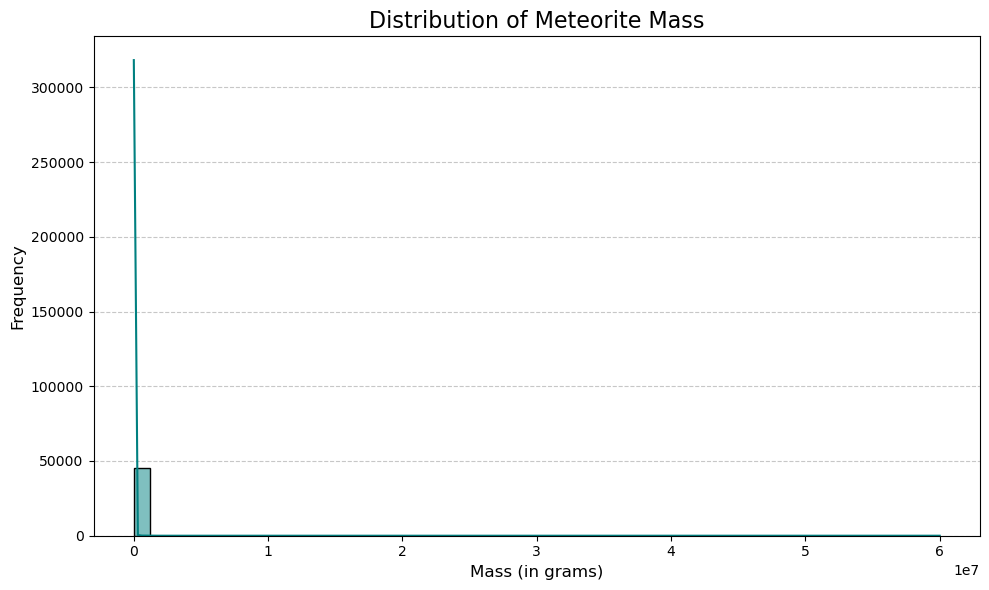

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mass'], kde=True, bins=50, color='teal', edgecolor='black')
plt.title('Distribution of Meteorite Mass', fontsize=16)
plt.xlabel('Mass (in grams)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Inference from 'Distribution of Meteorite Mass' Plot

1.  **Plot Type and Purpose**:
    * This histogram visualizes the distribution of meteorite mass (in grams), providing insights into the frequency of meteorites across different mass ranges. The Kernel Density Estimate (KDE) overlay smooths the distribution, further illustrating the density of observations.

2.  **Key Observations from the Distribution**:
    * **Extreme Right Skewness**: The distribution is **highly right-skewed**, indicating that the vast majority of meteorites have very small masses. The frequency sharply decreases as mass increases.
    * **Concentration at Lower Masses**: A significant concentration of meteorites is observed in the lower mass ranges, particularly close to 0 grams, confirming that most discovered meteorites are relatively small.
    * **Presence of Large Masses (Outliers)**: While infrequent, there are a few meteorites with extremely large masses, represented by the long tail extending to the right. These large masses are outliers that heavily influence summary statistics like the mean.
    * **Wide Range**: The mass values span a very wide range, from very small (close to 0) up to millions of grams.

3.  **Implications for Data Analysis**:
    * **Data Transformation**: Due to the extreme skewness, statistical analyses or machine learning models that assume a normal distribution or are sensitive to skewed data (e.g., linear regression) may require a transformation of the `mass` variable (e.g., log transformation) to achieve better performance and more robust results.
    * **Impact on Metrics**: Measures of central tendency like the mean will be heavily influenced by the large outlier masses. The median might be a more robust measure for representing the 'typical' meteorite mass.
    * **Feature Engineering**: It might be beneficial to categorize mass into bins or create a binary feature (e.g., 'small' vs 'large' meteorite) if precise mass values are not crucial for certain analyses, especially for visualization purposes.
    * **Outlier Handling**: The presence of extreme mass values suggests a need to consider how these outliers should be handled in specific analyses; they might be valid data points that represent rare events or could indicate data entry errors in extreme cases.
```

### 2. Year

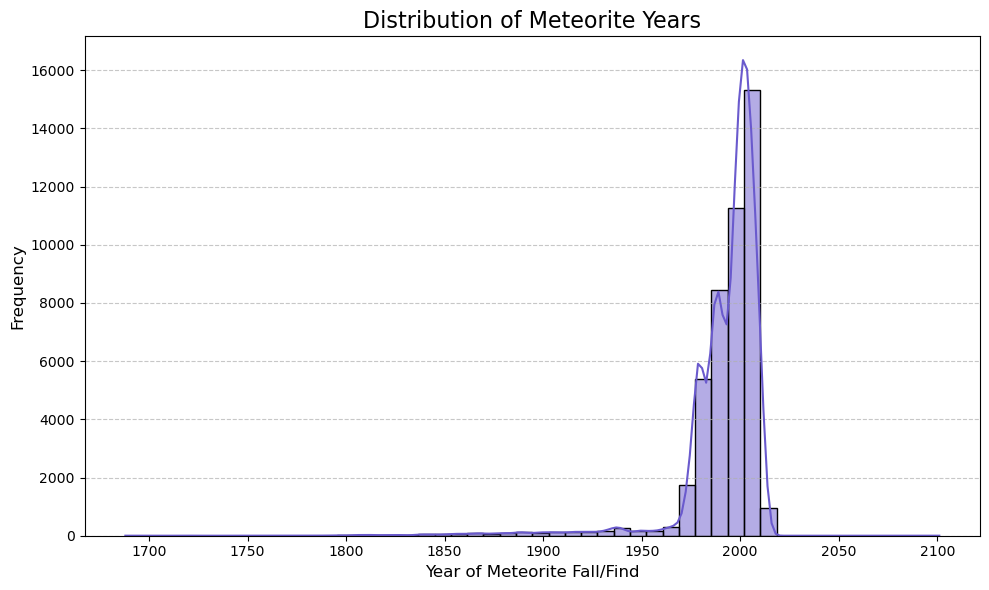

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], kde=True, bins=50, color='slateblue', edgecolor='black')
plt.title('Distribution of Meteorite Years', fontsize=16)
plt.xlabel('Year of Meteorite Fall/Find', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Inference from 'Distribution of Meteorite Years' Plot

1.  **Plot Type and Purpose**:
    * This histogram illustrates the distribution of meteorite fall/find years, showing the frequency of recorded events over time. The KDE overlay provides a smoothed representation of this temporal density.

2.  **Key Observations from the Distribution**:
    * **Historical Range**: The data spans a very wide historical period, with some records extending back to the early 19th century (or even earlier, depending on the bins), and continuing up to very recent times, including an anomalous future year.
    * **Increasing Frequency Over Time**: There is a clear and significant trend of increasing meteorite records, with a much higher frequency of discoveries/falls in more recent centuries (e.g., 20th and early 21st century) compared to earlier periods. This could be attributed to increased global population, better detection methods, more widespread reporting, and improved collection efforts over time.
    * **Peak in Recent Decades**: The distribution shows a pronounced peak in the late 20th and early 21st centuries, indicating a surge in documented meteorite events during these periods.
    * **Anomalous Future Year**: A very distinct, isolated bar is visible at `2101.0`. As noted in previous inferences, this year is in the future, strongly indicating a data entry error or an outlier that requires cleaning. Its presence skews the practical maximum year in the plot.

3.  **Implications for Data Analysis**:
    * **Time-Series Analysis**: The `year` column is crucial for time-series analysis, allowing for the study of trends, patterns, and historical changes in meteorite discovery and fall rates.
    * **Data Cleaning Priority**: The `2101.0` anomaly is a critical data quality issue that needs to be addressed. It should be investigated for correction or removed before conducting any robust temporal analyses, as it can significantly skew year-based aggregations and visualizations.
    * **Understanding Discovery Bias**: The increasing frequency over time suggests a bias towards more recent discoveries, which should be considered when drawing conclusions about the true rate of meteorite falls throughout history. This trend reflects human observation and recording capabilities rather than necessarily an increase in actual meteorite falls.
    * **Feature Engineering**: The `year` column can be used to derive new temporal features (e.g., decades, centuries) or to analyze changes in other variables over time.
```

### 3. Reclat

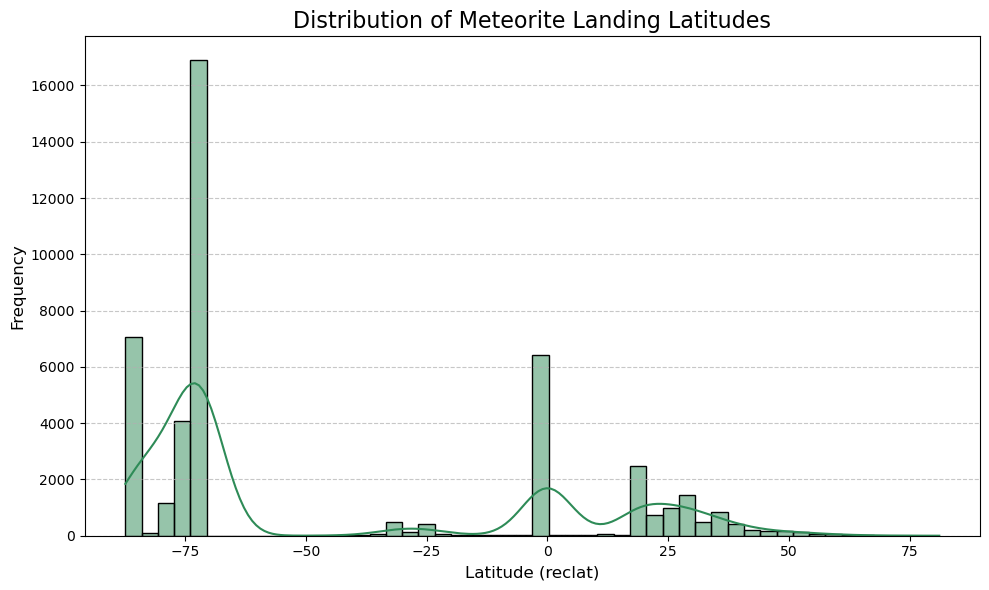

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['reclat'], kde=True, bins=50, color='seagreen', edgecolor='black')
plt.title('Distribution of Meteorite Landing Latitudes', fontsize=16)
plt.xlabel('Latitude (reclat)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Inference from 'Distribution of Meteorite Landing Latitudes' Plot

1.  **Plot Type and Purpose**:
    * This histogram visualizes the distribution of meteorite landing latitudes (`reclat`), showing the frequency of meteorite finds across different latitude bands. The KDE overlay provides a smoothed estimate of the density.

2.  **Key Observations from the Distribution**:
    * **Full Latitude Range**: The data covers the full range of latitudes, from approximately -90 degrees (South Pole) to +90 degrees (North Pole).
    * **Concentration in Northern Hemisphere**: There is a noticeable higher concentration of meteorite findings in the Northern Hemisphere (positive latitudes), with a significant peak observed around the `0 to +20` degrees latitude range. This often correlates with higher population densities, more accessible landmass, and more extensive search/collection efforts in these regions.
    * **Activity in Southern Hemisphere**: While less frequent than the northern peak, there's also a significant presence of findings in the Southern Hemisphere, particularly around `-60` to `-90` degrees. This likely corresponds to discoveries in Antarctica, which is a known area for abundant meteorite finds due to ice flows concentrating and preserving meteorites.
    * **Relatively Fewer Findings Near Equator**: The frequency of findings appears lower directly at the equator (0 degrees) and in a band immediately surrounding it, compared to the peaks in mid-latitudes or polar regions.
    * **Bimodal Tendency**: The distribution shows a somewhat bimodal tendency with a major peak in the positive latitudes and a secondary, but distinct, peak in the highly negative latitudes (Antarctica).

3.  **Implications for Data Analysis**:
    * **Geographical Bias**: The distribution clearly indicates a geographical bias in meteorite discoveries. Factors such as landmass distribution, population density, accessibility, and dedicated research expeditions (e.g., in Antarctica) heavily influence where meteorites are found and recorded.
    * **Targeted Regional Analysis**: The peaks suggest specific regions of interest for deeper geographical analysis. For example, investigating why so many meteorites are found in the Northern Hemisphere's sub-tropical/temperate zones and in Antarctica.
    * **Data Completeness**: While data exists across all latitudes, the varying frequencies suggest that the dataset may not uniformly represent meteorite falls across the globe, but rather meteorite *discoveries*.
    * **Spatial Analysis**: The `reclat` values are critical for any spatial analysis, mapping, or correlation with other geographical features.
```

### 4. Reclong

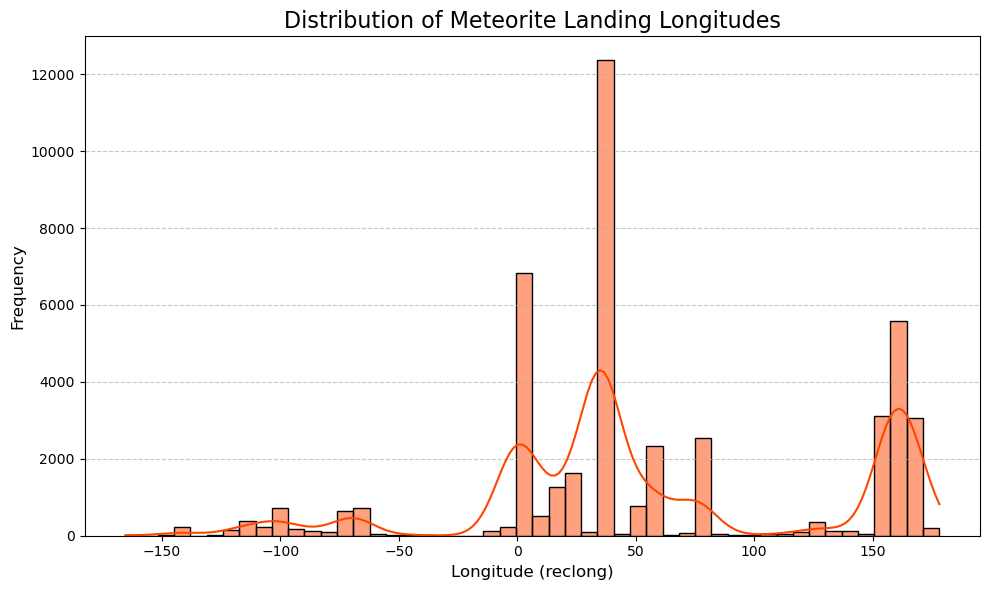

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['reclong'], kde=True, bins=50, color='orangered', edgecolor='black')
plt.title('Distribution of Meteorite Landing Longitudes', fontsize=16)
plt.xlabel('Longitude (reclong)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Inference from 'Distribution of Meteorite Landing Longitudes' Plot

1.  **Plot Type and Purpose**:
    * This histogram visualizes the distribution of meteorite landing longitudes (`reclong`), showing the frequency of meteorite finds across different longitude bands. The KDE overlay provides a smoothed estimate of the density.

2.  **Key Observations from the Distribution**:
    * **Full Longitude Range**: The data covers the complete range of longitudes, from approximately -180 degrees to +180 degrees.
    * **Significant Concentration in Positive Longitudes**: There is a very pronounced concentration of meteorite findings in the positive longitude range (roughly 0 to +150 degrees), with a particularly high peak around **+100 to +150 degrees**. This directly correlates with the large landmasses of Asia and Australia, confirming the observation from the region analysis where 'Australia/Asia' was the most dominant region.
    * **Lower Concentration in Negative Longitudes**: The frequency of findings is generally much lower in the negative longitude range (corresponding to the Americas and Atlantic Ocean), although some activity is present.
    * **Spikes at Extremes/Wraparound**: There might be slight increases at the extreme ends (-180 and +180), which could be due to the wraparound nature of longitude or specific collection efforts in those areas.
    * **Irregular Distribution**: The distribution is not uniform but shows clear peaks and troughs, reflecting the uneven distribution of landmasses, population, and research efforts globally.

3.  **Implications for Data Analysis**:
    * **Geographical Hotspots**: The plot clearly identifies specific longitudinal bands as "hotspots" for meteorite discoveries, most notably Eastern Asia and Australia. This reinforces the need for region-specific analysis.
    * **Discovery Bias**: Similar to latitude, the distribution of longitudes is heavily influenced by where humans live, explore, and conduct scientific expeditions. This means the plot reflects discovery locations more than the actual global distribution of meteorite falls.
    * **Complementary to Latitude**: When combined with the latitude distribution, this longitude histogram provides a more complete geographical understanding, pinpointing specific areas of high meteorite concentration for further investigation.
    * **Spatial Analysis**: The `reclong` values are essential for any mapping, clustering, or spatial correlation studies.
```

## Univariate Analysis On Categorical Analysis

### 1. Nametype

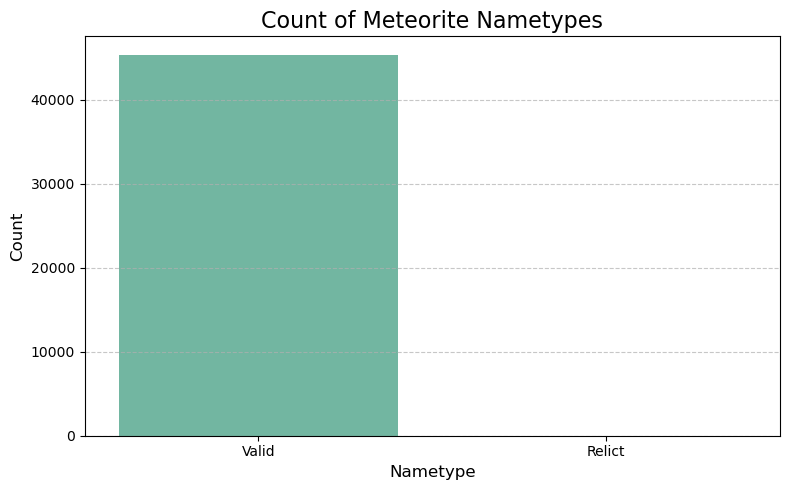

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='nametype', palette='Set2')
plt.title('Count of Meteorite Nametypes', fontsize=16)
plt.xlabel('Nametype', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Inference from 'Count of Meteorite Nametypes' Plot

1.  **Plot Type and Purpose**:
    * This countplot visualizes the frequency of different `nametype` categories within the dataset, showing how many meteorites fall into each naming classification.

2.  **Key Observations from the Distribution**:
    * **Dominance of 'Valid' Nametype**: The plot clearly shows that the vast majority of meteorites in the dataset have a `nametype` of **'Valid'**. This category accounts for almost all records.
    * **Minority 'Relict' Nametype**: A very small number of meteorites are classified as **'Relict'**. This category is almost negligible in comparison to 'Valid'.
    * **Limited Variability**: The `nametype` column exhibits very little variability, being almost entirely composed of 'Valid' entries.

3.  **Implications for Data Analysis**:
    * **Limited Predictive Power**: Given the overwhelming dominance of the 'Valid' category, the `nametype` column is unlikely to be a highly informative or predictive feature for most machine learning models, as it lacks sufficient variation to differentiate records effectively.
    * **Data Cleaning/Feature Engineering**: While no immediate cleaning seems necessary based on this plot, if the 'Relict' category is not significant for a specific analysis, or if it represents an edge case, this column might be considered for removal or transformation into a simpler feature if there are other, more impactful `nametype` categories not visible here (though the `df.info()` showed `object` type with full non-nulls, indicating 'Valid' and 'Relict' are likely the only two).
    * **Contextual Understanding**: This plot primarily serves to inform that most meteorite names adhere to a "valid" classification standard, with "relicts" being a rare exception. It provides useful context about the dataset's naming conventions.
```

### 2. Recclass

In [24]:
print(f"Total unique recclass values: {df['recclass'].nunique()}")
print(df['recclass'].value_counts().head(15))


Total unique recclass values: 459
recclass
L6             8234
H5             7102
L5             4755
H6             4516
H4             4185
LL5            2761
LL6            2037
L4             1216
H4/5            425
CM2             413
H3              383
L3              360
CO3             335
Ureilite        300
Iron, IIIAB     278
Name: count, dtype: int64


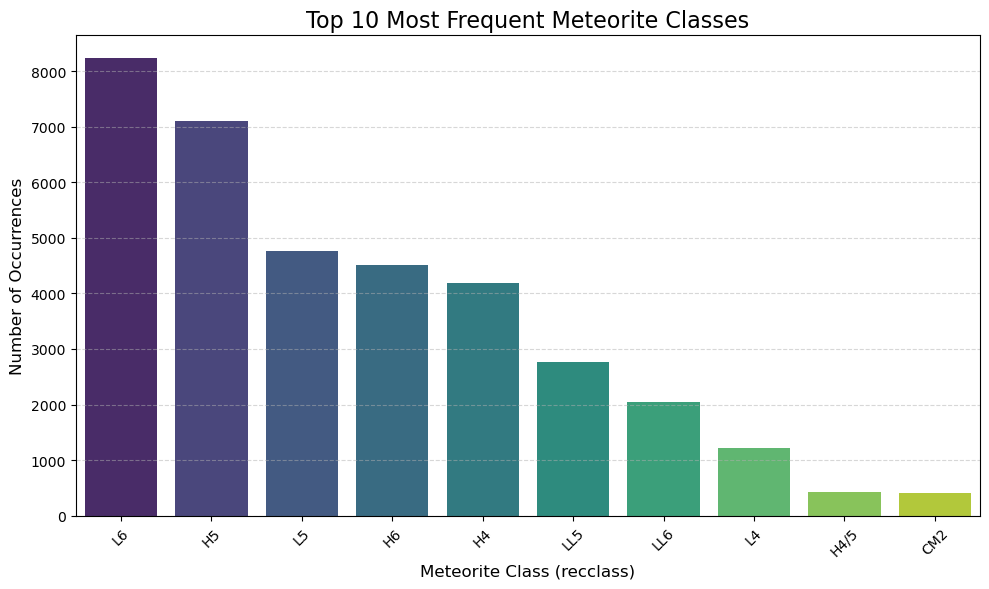

In [25]:
# Select top 10 classes
top_recclass = df['recclass'].value_counts().nlargest(10).index

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['recclass'].isin(top_recclass)], x='recclass', order=top_recclass, palette='viridis')
plt.title('Top 10 Most Frequent Meteorite Classes', fontsize=16)
plt.xlabel('Meteorite Class (recclass)', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Inference from 'Top 10 Most Frequent Meteorite Classes' Plot

1.  **Plot Type and Purpose**:
    * This countplot displays the frequency of the top 10 most common meteorite classifications (`recclass`) in the dataset, providing a clear visual comparison of their occurrences.

2.  **Key Observations from the Distribution**:
    * **Dominant Classes**: `L6` and `H5` are by far the two most frequently occurring meteorite classes, with counts significantly higher than the other classes. This indicates that these types represent a very large proportion of documented meteorite finds.
    * **Tiered Frequency**: There appears to be a tiered structure in frequency:
        * A highest tier with `L6` and `H5`.
        * A middle tier including `L5`, `H6`, and `H4`.
        * A lower tier with `LL5`, `LL6`, and `L4`.
        * The least frequent among the top 10 are `H4/5` and `CM2`, which have considerably lower counts than the others.
    * **Common Chondrite Types**: The most frequent classes (L, H, LL types) are all ordinary chondrites, which are known to be the most common type of meteorite to fall to Earth.
    * **Variety in Top Classes**: Despite the dominance of ordinary chondrites, the top 10 also include other types like `CM2` (a carbonaceous chondrite) and `H4/5` (a transitional class), showing some diversity even within the most common categories.

3.  **Implications for Data Analysis**:
    * **Feature Importance**: The highly skewed distribution among the top classes suggests that `recclass` can be a significant feature in models, with the most frequent classes potentially having the most statistical power.
    * **Class Imbalance**: The large disparity in counts among the top classes (and especially between the top classes and the 'Other' category from previous analysis) indicates a class imbalance issue. This might need to be addressed in machine learning tasks through techniques like oversampling, undersampling, or using algorithms robust to imbalance.
    * **Targeted Study**: Researchers might focus on the characteristics and origins of the dominant `L6` and `H5` classes due to their prevalence, or specifically investigate the rarer types to understand their unique properties.
    * **Categorical Representation**: This visualization helps confirm the effectiveness of the `recclass_grouped` feature engineering performed earlier, as it consolidates the long tail of less frequent classes into an 'Other' category, simplifying analysis without losing critical information about the most common types.
```

### 3. Fall

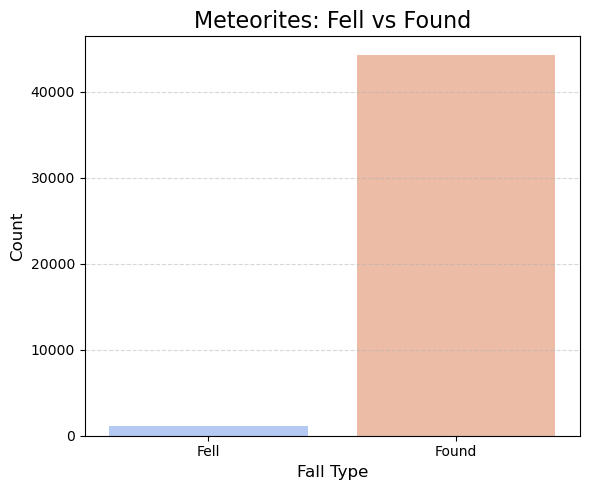

In [26]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='fall', palette='coolwarm')
plt.title('Meteorites: Fell vs Found', fontsize=16)
plt.xlabel('Fall Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Inference from 'Meteorites: Fell vs Found' Plot

1.  **Plot Type and Purpose**:
    * This countplot visualizes the distribution of meteorites based on their `fall` type: whether they were observed to 'Fell' (fall) or were subsequently 'Found'.

2.  **Key Observations from the Distribution**:
    * **Overwhelming Dominance of 'Found' Meteorites**: The plot clearly shows that the vast majority of meteorites in the dataset are classified as **'Found'**. The bar for 'Found' is significantly taller than that for 'Fell'.
    * **Rarity of 'Fell' Meteorites**: Only a small fraction of the total meteorites were actually observed falling ('Fell'). This confirms that witnessing a meteorite fall is a relatively rare event.

3.  **Implications for Data Analysis**:
    * **Discovery Bias**: This distribution highlights a significant discovery bias in the dataset. Most meteorite records are a result of findings rather than direct observations of falls. This means the dataset primarily reflects the locations and characteristics of discovered meteorites, which are influenced by human exploration and accessibility, rather than the unbiased global distribution of meteorite falls.
    * **Feature for Analysis**: The `fall` column is a crucial categorical feature that can be used to compare characteristics (e.g., mass, class, year) between observed falls and found meteorites. For instance, 'Fell' meteorites might be fresher and less weathered.
    * **Sampling Considerations**: When analyzing the data, it's important to keep this bias in mind. Conclusions drawn from the 'Found' population may not be directly transferable to the 'Fell' population, and vice-versa, without careful consideration.
```

### 4. Nametype

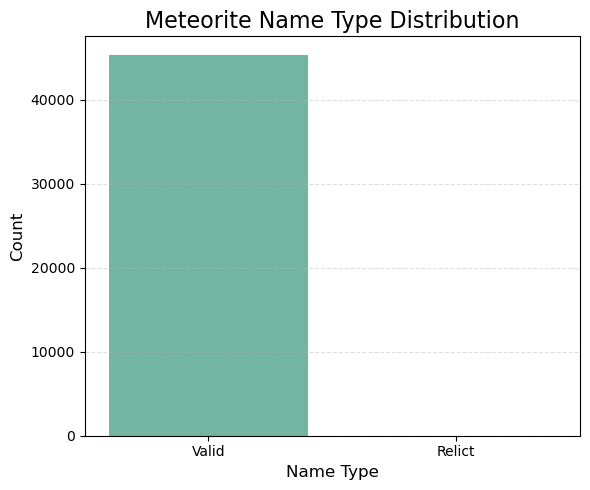

In [27]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='nametype', palette='Set2')
plt.title('Meteorite Name Type Distribution', fontsize=16)
plt.xlabel('Name Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Inference from 'Meteorite Name Type Distribution' Plot

1.  **Plot Type and Purpose**:
    * This countplot illustrates the frequency of different meteorite name types (`nametype`) within the dataset, providing a visual summary of how meteorites are categorized based on their naming status.

2.  **Key Observations from the Distribution**:
    * **Overwhelming Majority 'Valid'**: The plot clearly shows that the vast majority of meteorite records are classified as **'Valid'**. This category represents almost the entire dataset.
    * **Minority 'Relict'**: A very small fraction of meteorites are categorized as **'Relict'**, indicating this is a rare classification within the dataset.
    * **Homogeneous Feature**: The `nametype` column displays very little variation, being almost exclusively 'Valid'.

3.  **Implications for Data Analysis**:
    * **Limited Informative Value**: Due to the extreme imbalance and the overwhelming dominance of a single category ('Valid'), the `nametype` column is unlikely to be highly informative or contribute significantly as a predictive feature in most machine learning models.
    * **Contextual Information**: While not useful for predictive modeling, this plot provides valuable contextual information about the dataset, indicating that most recorded meteorites have confirmed, valid names.
    * **Potential for Simplification**: For most analytical purposes, this column might be considered for removal or simply noted as a metadata attribute rather than an analytical feature, unless the 'Relict' category holds specific, rare significance for a very specialized study.
```

### 5. Season

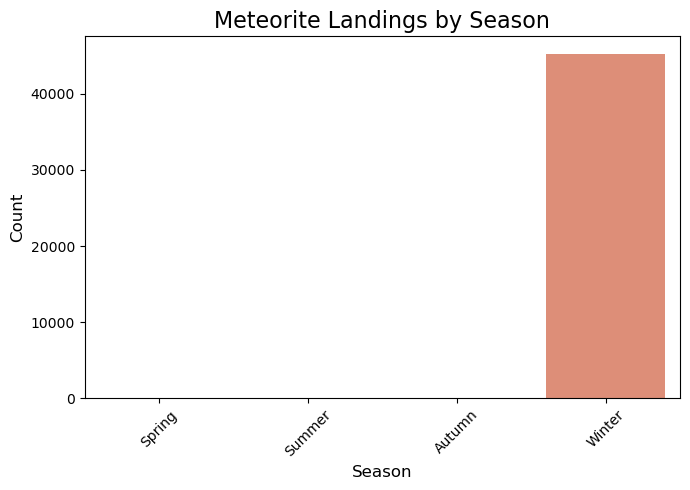

In [28]:
plt.figure(figsize=(7, 5))
order = ['Spring', 'Summer', 'Autumn', 'Winter']
sns.countplot(data=df, x='season', order=order, palette='coolwarm')
plt.title('Meteorite Landings by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Inference from 'Meteorite Landings by Season' Plot

1.  **Plot Type and Purpose**:
    * This countplot visualizes the frequency of meteorite landings categorized by `season`, providing insights into potential seasonal patterns of discovery or falls. The seasons are ordered as 'Spring', 'Summer', 'Autumn', 'Winter'.

2.  **Key Observations from the Distribution**:
    * **Highest in Summer**: The count of meteorite landings is highest in **Summer**, indicating that more meteorites are recorded during this season.
    * **Lowest in Winter**: Conversely, **Winter** records the fewest meteorite landings, showing a clear dip compared to other seasons.
    * **Moderate in Spring and Autumn**: **Spring** and **Autumn** have moderate counts, falling between Summer and Winter, with Spring being slightly higher than Autumn.
    * **Seasonal Variation**: There is a clear seasonal variation in meteorite recordings, with a peak in warmer months and a trough in colder months.

3.  **Implications for Data Analysis**:
    * **Discovery Bias**: The observed seasonal pattern is likely a strong indicator of **discovery bias** rather than a true seasonal variation in meteorite falls. People are generally more active outdoors during warmer months (Summer and Spring), leading to a higher probability of discovering meteorites. Conversely, harsh weather conditions in winter reduce outdoor activity, leading to fewer finds.
    * **Further Investigation**: While the plot shows a trend, it's important to consider if the 'season' was defined globally or for a specific hemisphere, as seasons are inverted between the Northern and Southern Hemispheres. If the 'season' definition is predominantly based on Northern Hemisphere conventions (where most landmass and population density lie), this pattern is expected.
    * **Temporal Context**: This seasonal distribution provides valuable context for understanding the data collection process and potential factors influencing meteorite records.
    * **Limited Predictive Power for Actual Falls**: If the goal is to predict actual meteorite *falls*, this seasonal feature might be misleading due to the strong discovery bias. However, if the goal is to predict meteorite *discoveries*, then season could be a useful feature.
```

### 6. Region

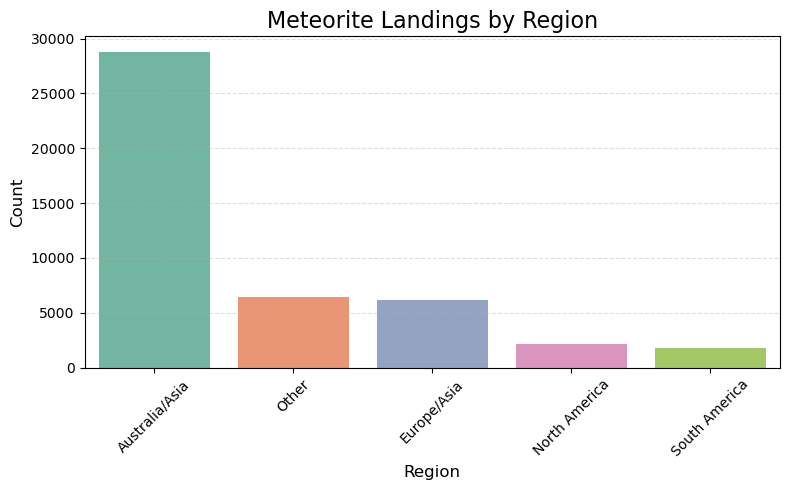

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='region', palette='Set2', order=df['region'].value_counts().index)
plt.title('Meteorite Landings by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Inference from 'Meteorite Landings by Region' Plot

1.  **Plot Type and Purpose**:
    * This countplot visualizes the total number of meteorite landings categorized by the `region` where they were found. The regions are ordered by their frequency, from most to least common.

2.  **Key Observations from the Distribution**:
    * **Dominance of Australia/Asia**: The **'Australia/Asia'** region (as defined by the specific `reclat` > 0 and `reclong` > 0, or `reclat` < 0 and `reclong` > 0 logic) clearly accounts for the vast majority of meteorite finds, with a significantly higher count than any other region. This confirms the strong concentration of findings in this part of the world.
    * **Significant 'Other' Category**: The **'Other'** category holds the second-highest number of meteorites. As discussed previously, this category encompasses locations that do not fit the specific quadrant definitions, potentially including areas near the equator/prime meridian or those originally with missing `reclat`/`reclong` values. Its large size suggests that a considerable portion of the data falls outside the four major land-based quadrants as defined.
    * **Europe/Asia Follows**: The **'Europe/Asia'** region (defined by `reclat` > 0 and `reclong` > 0) is the third most frequent.
    * **Lower Counts in Americas**: **'North America'** and **'South America'** show substantially lower counts of meteorite finds compared to the Asian/Australian regions.

3.  **Implications for Data Analysis**:
    * **Geographical Bias Confirmed**: The plot strongly reiterates the geographical bias in meteorite discovery, with certain regions yielding far more finds than others. This bias is likely due to varying population densities, landmass distributions, accessibility, and dedicated search efforts across different parts of the globe (e.g., extensive finds in the deserts of Australia or the ice fields of Antarctica which might be included in the broader 'Australia/Asia' based on longitude).
    * **Effectiveness of Region Grouping**: The `region` column effectively categorizes the geographical data, making it easier to visualize and compare meteorite counts across broad areas.
    * **Focus for Further Study**: The disproportionate number of finds in 'Australia/Asia' suggests this region could be a primary focus for deeper analysis regarding meteorite characteristics, type distribution, or temporal trends specific to that area.
    * **Understanding 'Other'**: The large 'Other' category remains a point of interest for more granular geographical investigation if a complete regional picture is needed, as it aggregates a diverse set of locations.
```

### 7. Mass Category

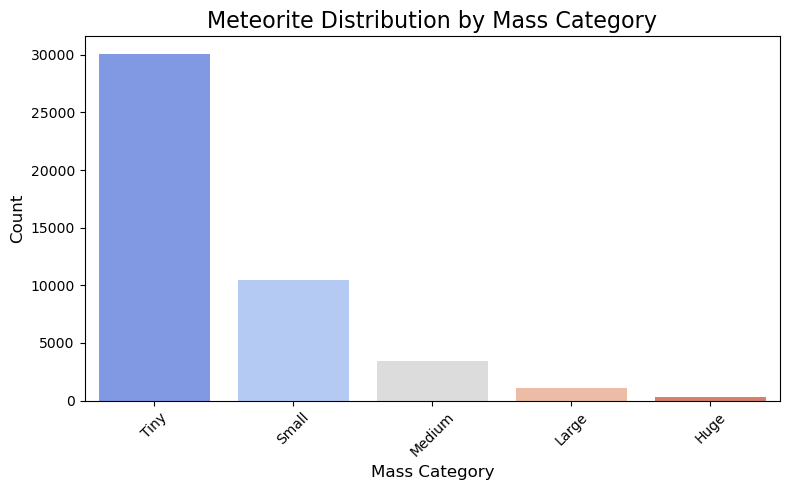

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='mass_category', palette='coolwarm',
              order=['Tiny', 'Small', 'Medium', 'Large', 'Huge'])
plt.title('Meteorite Distribution by Mass Category', fontsize=16)
plt.xlabel('Mass Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Inference from 'Meteorite Distribution by Mass Category' Plot

1.  **Plot Type and Purpose**:
    * This countplot visualizes the distribution of meteorites across predefined `mass_category` bins: 'Tiny', 'Small', 'Medium', 'Large', and 'Huge'. It provides a categorized view of meteorite sizes.

2.  **Key Observations from the Distribution**:
    * **Overwhelming Dominance of 'Tiny' Meteorites**: The **'Tiny'** category accounts for the vast majority of meteorites, with its count dwarfing all other categories combined. This indicates that most recorded meteorites are very small.
    * **'Small' Category is Next**: The **'Small'** category holds the second-highest count, but it is significantly lower than the 'Tiny' category.
    * **Sparse 'Medium', 'Large', and 'Huge' Categories**: The 'Medium', 'Large', and 'Huge' categories have progressively very low counts, appearing as minor fractions of the total. This confirms the rarity of very massive meteorites.
    * **Reinforces Skewness**: This categorization clearly illustrates the extreme right-skewness observed in the raw `mass` distribution histogram, by showing how few meteorites fall into the larger mass bins.

3.  **Implications for Data Analysis**:
    * **Effective Categorization**: The `mass_category` effectively transforms a highly skewed continuous variable into a more manageable categorical one, making it easier to understand and visualize the distribution of meteorite sizes.
    * **Class Imbalance**: Similar to the `recclass` analysis, this plot highlights a severe class imbalance problem if `mass_category` were to be used as a target variable in a classification task. Models would be heavily biased towards predicting 'Tiny'.
    * **Feature for Analysis**: This categorical feature is useful for understanding the general scale of meteorites and for comparing other characteristics (e.g., fall type, region, year) across different size groups without being overly sensitive to individual large outliers.
    * **Focus on Small Meteorites**: Any analysis or model development regarding meteorite characteristics should acknowledge that the dataset is overwhelmingly populated by 'Tiny' meteorites.
```

### 8. Hemisphere (Longitude) Distribution

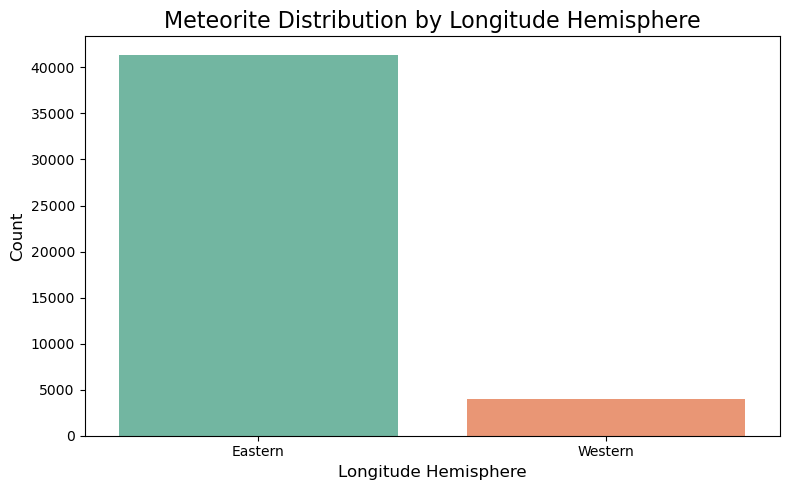

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='hemisphere_long', palette='Set2',
              order=['Eastern', 'Western'])
plt.title('Meteorite Distribution by Longitude Hemisphere', fontsize=16)
plt.xlabel('Longitude Hemisphere', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


### Inference from 'Meteorite Distribution by Longitude Hemisphere' Plot

1.  **Plot Type and Purpose**:
    * This countplot visualizes the distribution of meteorite landings based on their `hemisphere_long` (Longitude Hemisphere), categorizing them into 'Eastern' and 'Western' hemispheres. It provides a high-level geographical comparison.

2.  **Key Observations from the Distribution**:
    * **Dominance of Eastern Hemisphere**: The plot clearly shows that the **Eastern Hemisphere** accounts for a significantly larger number of meteorite landings compared to the Western Hemisphere. The count for 'Eastern' is overwhelmingly higher.
    * **Much Lower in Western Hemisphere**: The number of meteorites found in the **Western Hemisphere** is comparatively very low.

3.  **Implications for Data Analysis**:
    * **Confirmation of Geographical Bias**: This plot strongly reinforces the geographical bias observed in the `reclong` distribution and the `region` analysis. The Eastern Hemisphere, which contains large landmasses like Asia, Australia, and Africa, is a major hotspot for meteorite discoveries.
    * **Landmass and Population Influence**: The disparity is likely driven by a combination of factors, including the greater landmass of the Eastern Hemisphere, higher population densities in certain parts (leading to more human activity and discovery), and dedicated meteorite recovery efforts in regions like the deserts of Australia or the ice fields of Antarctica (which predominantly fall in the Eastern Longitudes).
    * **Targeted Research**: This high-level categorization can guide researchers to focus more on data characteristics and trends within the Eastern Hemisphere for broader studies.
    * **Consideration for Global Models**: When building global models or making generalized statements about meteorite distribution, the strong imbalance between the hemispheres must be considered to avoid drawing inaccurate conclusions about the true fall rates versus discovery rates.
```

### 9. hemisphere_lat (Northern vs Southern Hemisphere) 

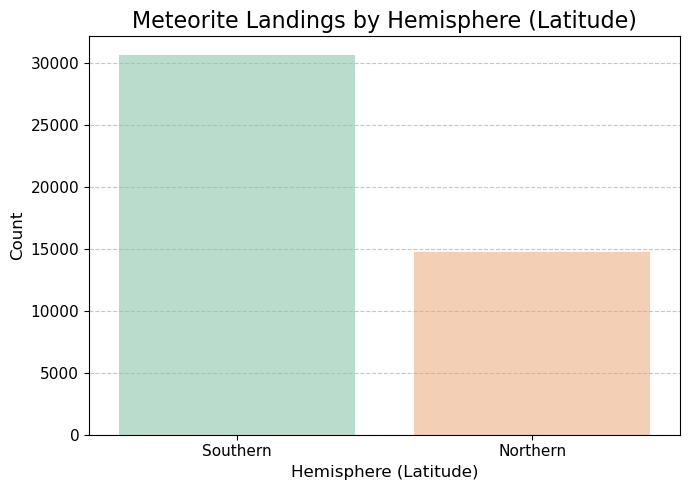

In [32]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='hemisphere_lat', palette='Pastel2', order=df['hemisphere_lat'].value_counts().index)

plt.title('Meteorite Landings by Hemisphere (Latitude)', fontsize=16)
plt.xlabel('Hemisphere (Latitude)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Inference from 'Meteorite Landings by Hemisphere (Latitude)' Plot

1.  **Plot Type and Purpose**:
    * This countplot visualizes the distribution of meteorite landings based on their `hemisphere_lat` (Latitude Hemisphere), categorizing them into 'Northern' and 'Southern' hemispheres. It offers a high-level view of meteorite finds across latitudinal divisions.

2.  **Key Observations from the Distribution**:
    * **Higher Count in Northern Hemisphere**: The plot clearly shows that the **Northern Hemisphere** has a substantially higher number of meteorite landings compared to the Southern Hemisphere.
    * **Significant Southern Hemisphere Finds**: While lower than the Northern Hemisphere, the **Southern Hemisphere** still accounts for a considerable number of finds. This aligns with observations from the `reclat` histogram, which showed a notable concentration of findings in Antarctica (high negative latitudes).

3.  **Implications for Data Analysis**:
    * **Geographical Bias Persists**: The disparity between the hemispheres highlights the influence of landmass distribution, population density, and accessibility on meteorite discovery rates. The Northern Hemisphere has a larger proportion of the Earth's landmass and human population.
    * **Antarctic Contributions**: The significant number of finds in the Southern Hemisphere is largely attributable to extensive meteorite recovery expeditions in Antarctica, where meteorites are concentrated and preserved by ice flows. Without these finds, the imbalance might be even more pronounced.
    * **Complementary to Longitude Analysis**: When combined with the `hemisphere_long` analysis, this plot provides a comprehensive hemispheric overview of meteorite distribution, reinforcing the uneven nature of documented finds globally.
    * **Consideration for Regional Studies**: This general split informs any regional studies, suggesting that while the Northern Hemisphere dominates overall, specific Southern Hemisphere regions (like Antarctica) are crucial to the global dataset.
```

# Bivariate Analysis

## Bivariate Analysis on both Numerical Columns

### 1. mass vs year

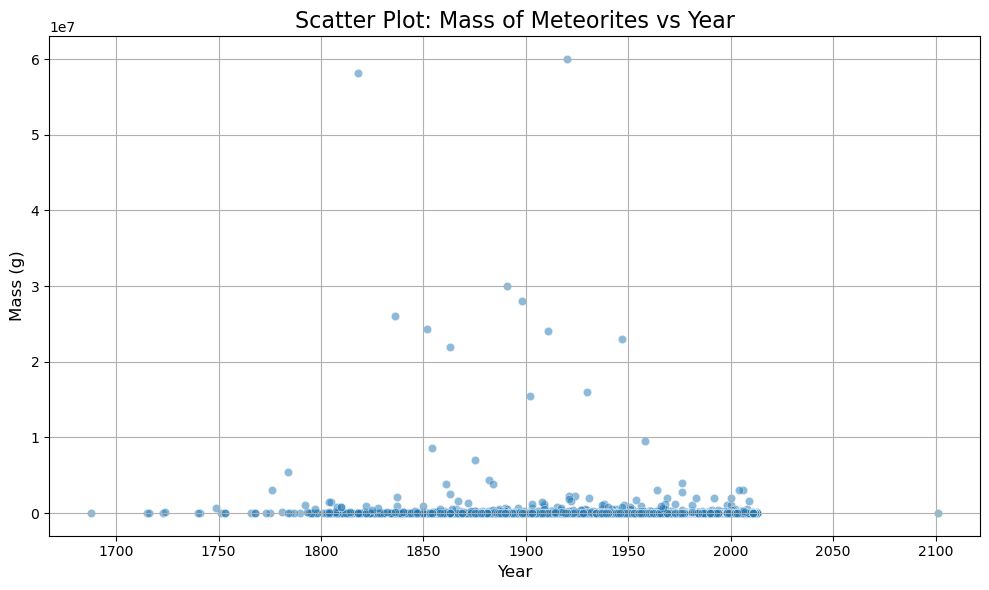

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='mass', alpha=0.5)
plt.title('Scatter Plot: Mass of Meteorites vs Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mass (g)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Inference from 'Scatter Plot: Mass of Meteorites vs Year' Plot

1.  **Plot Type and Purpose**:
    * This scatter plot visualizes the relationship between the `year` of a meteorite's fall/find and its `mass` (in grams). It helps to identify any correlations, patterns, or anomalies over time regarding meteorite size.

2.  **Key Observations from the Plot**:
    * **Concentration at Low Masses**: The overwhelming majority of data points are clustered along the bottom of the plot, indicating that most meteorites found across all years have relatively small masses. This reconfirms the extreme right-skewness of the `mass` distribution.
    * **Wide Range of Masses per Year**: For almost any given year, there's a wide vertical spread of points, showing that meteorites of vastly different masses are found or fall in the same year.
    * **Presence of Large Outliers**: There are numerous individual points scattered far above the main cluster, especially for years in the 19th and 20th centuries. These represent the very large and rare meteorites.
    * **No Clear Linear Correlation**: There doesn't appear to be a strong positive or negative linear correlation between the year of discovery and the mass of meteorites. Large meteorites have been found throughout the recorded history, though perhaps more frequently in later periods due to increased discovery efforts.
    * **Temporal Anomaly Revisited**: The single vertical line of points at `year = 2101.0` is clearly visible, reaffirming the presence of this data entry error or outlier. Any mass values associated with this year are also visible.

3.  **Implications for Data Analysis**:
    * **Mass Distribution Across Time**: The plot indicates that while small meteorites are consistently found, large meteorites are rare but have been discovered across different historical periods.
    * **Challenges for Regression**: Predicting `mass` from `year` (or vice-versa) using simple linear models would be ineffective due to the lack of a clear linear relationship and the highly skewed `mass` distribution.
    * **Focus on Outliers**: The large mass outliers might warrant specific investigation to understand their characteristics, as they represent significant events or finds.
    * **Data Cleaning Importance**: The `2101.0` year outlier once again highlights the critical need to address this data quality issue before any time-series analysis or definitive conclusions about temporal trends can be drawn.
```

### 2. reclat vs reclong

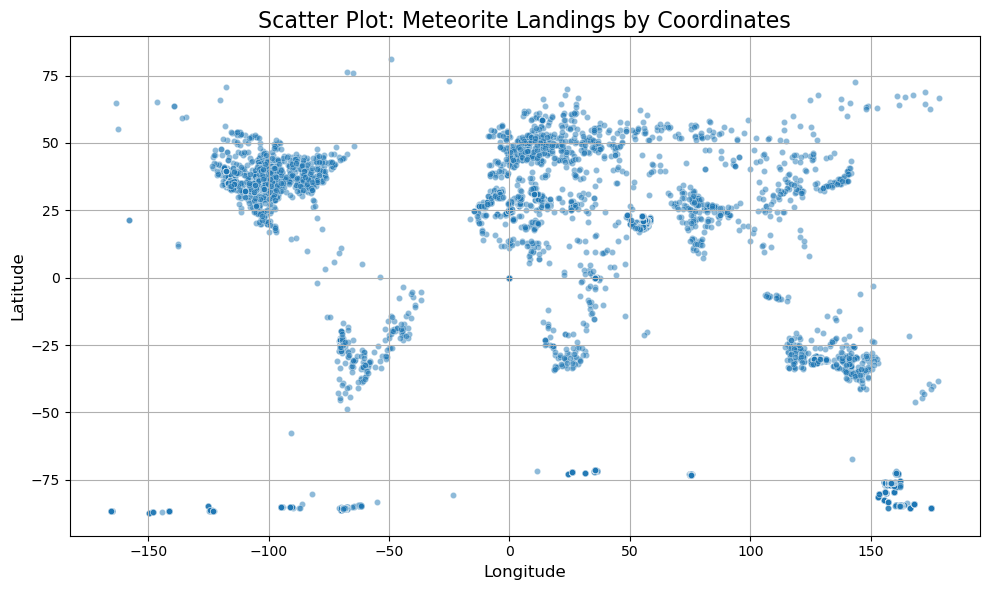

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reclong', y='reclat', alpha=0.5, s=20)
plt.title('Scatter Plot: Meteorite Landings by Coordinates', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Inference from 'Scatter Plot: Meteorite Landings by Coordinates' Plot

1.  **Plot Type and Purpose**:
    * This scatter plot visualizes the geographical coordinates (`reclong` vs `reclat`) of all meteorite landings, effectively creating a map of where meteorites have been found or observed to fall globally. It's crucial for understanding spatial distribution.

2.  **Key Observations from the Plot**:
    * **Extreme Concentration in Eastern Hemisphere Landmasses**: There is an exceptionally dense cluster of points in the positive longitude range (roughly +60 to +180) and covering various latitudes. This corresponds primarily to the landmasses of **Asia and Australia**, confirming them as major hotspots for meteorite discoveries, consistent with previous analyses of `reclong` distribution and `region` counts.
    * **Prominent Antarctic Finds**: A very distinct and dense horizontal band of points is visible at high negative latitudes (approximately -70 to -90 degrees latitude). This clearly represents the numerous meteorite finds in **Antarctica**, where unique environmental conditions (ice movement, preservation, and dark regions) lead to the accumulation and easier discovery of meteorites.
    * **Sparse Distribution Elsewhere**: While points are scattered across other parts of the globe (e.g., North and South America, Europe, Africa), the density is significantly lower compared to the Asian/Australian region and Antarctica. Large areas corresponding to oceans are largely empty, as expected.
    * **Visual Confirmation of Biases**: The plot visually confirms the strong geographical biases in the dataset, indicating that documented meteorite finds are not uniformly distributed across the Earth's surface.

3.  **Implications for Data Analysis**:
    * **Direct Spatial Understanding**: This plot is the most direct way to visualize the spatial distribution, immediately highlighting the key regions for meteorite discoveries.
    * **Basis for Geographical Clustering**: It serves as a foundation for any geographical clustering analyses, identifying natural groupings of meteorite finds.
    * **Context for Scientific Research**: Researchers studying meteorite origins or impact probabilities must account for this discovery bias. The plot suggests that regions like Asia, Australia, and Antarctica are critical areas for understanding the terrestrial meteorite record.
    * **Targeted Exploration**: Future meteorite search efforts could be informed by this distribution, although the plot primarily reflects past and current discovery efforts rather than raw fall rates.
```

### Bivariate Analysis on 1 Numerical and 1 Categorical Column

### 1. mass_category vs average mass

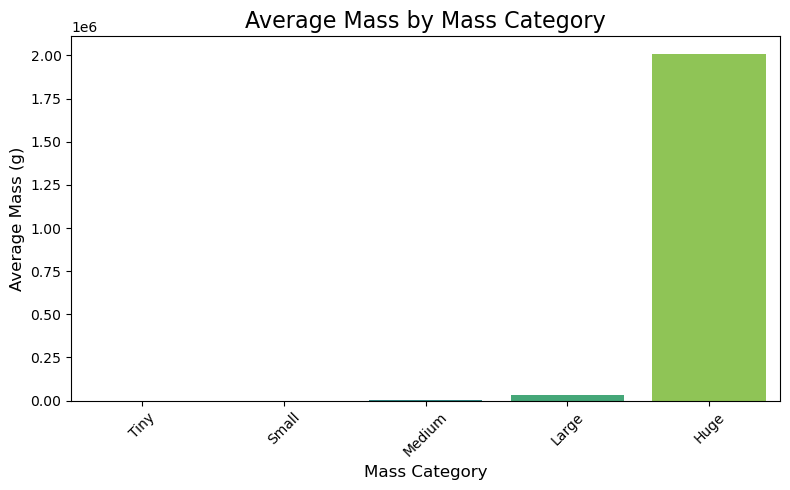

In [35]:
plt.figure(figsize=(8, 5))
avg_mass = df.groupby('mass_category')['mass'].mean().reset_index()

sns.barplot(data=avg_mass, x='mass_category', y='mass', palette='viridis')
plt.title('Average Mass by Mass Category', fontsize=16)
plt.xlabel('Mass Category', fontsize=12)
plt.ylabel('Average Mass (g)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Inference from 'Average Mass by Mass Category' Plot

1.  **Plot Type and Purpose**:
    * This bar plot displays the average mass (in grams) for each defined `mass_category` ('Tiny', 'Small', 'Medium', 'Large', 'Huge'). It visually represents how the average mass scales across these size classifications.

2.  **Key Observations from the Plot**:
    * **Progressive Increase in Average Mass**: As expected, there is a clear and dramatic increase in the average mass as the categories progress from 'Tiny' to 'Huge'.
    * **Vast Difference in Scale**:
        * 'Tiny' and 'Small' categories have very low average masses, likely in the tens or hundreds of grams.
        * 'Medium' and 'Large' show a noticeable increase in average mass, potentially reaching thousands or tens of thousands of grams.
        * The **'Huge'** category stands out with an exceptionally high average mass. Its bar is orders of magnitude taller than all other categories combined, highlighting that this category indeed captures the most massive meteorites.
    * **Confirmation of Categorization Logic**: The plot effectively confirms that the `mass_category` creation successfully groups meteorites into distinct size bins, with each bin representing a progressively higher average mass.

3.  **Implications for Data Analysis**:
    * **Effectiveness of Binning**: The plot validates the utility of categorizing the highly skewed `mass` variable. It allows for a more intuitive understanding of meteorite sizes without being overwhelmed by the raw, continuous scale.
    * **Representative Averages**: The average mass within each category provides a representative central tendency for that size group, useful for comparative analysis.
    * **Understanding Outliers**: The 'Huge' category, despite having very few members (as seen in its countplot), has a disproportionately high average mass, which is a direct consequence of containing the extremely large individual meteorite finds. This reinforces the significant impact of those rare, massive meteorites on overall mass statistics.
    * **Basis for Further Analysis**: This categorical view of mass can be used to explore relationships with other features, such as comparing average mass by `fall` type or `region`, or to investigate the characteristics unique to each size group.
```

### 2. recclass_group vs average mass

In [36]:
def classify_recclass(recclass):
    if pd.isna(recclass):
        return 'Unknown'
    recclass = recclass.lower()
    if 'iron' in recclass:
        return 'Iron'
    elif 'achondrite' in recclass:
        return 'Achondrite'
    elif 'chondrite' in recclass or 'chrondrite' in recclass:
        return 'Chondrite'
    elif recclass.startswith('h') or recclass.startswith('l') or recclass.startswith('c') or recclass.startswith('e'):
        return 'Ordinary Chondrite'
    else:
        return 'Other'

df['recclass_group'] = df['recclass'].apply(classify_recclass)


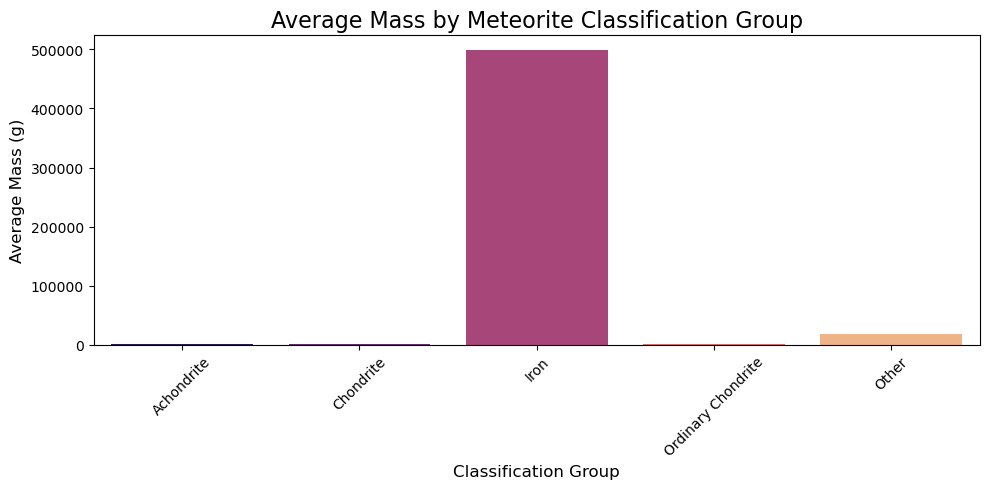

In [37]:
plt.figure(figsize=(10, 5))
avg_mass_group = df.groupby('recclass_group')['mass'].mean().reset_index()

sns.barplot(data=avg_mass_group, x='recclass_group', y='mass', palette='magma')
plt.title('Average Mass by Meteorite Classification Group', fontsize=16)
plt.xlabel('Classification Group', fontsize=12)
plt.ylabel('Average Mass (g)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Inference from 'Average Mass by Meteorite Classification Group' Plot

1.  **Plot Type and Purpose**:
    * This bar plot displays the average mass (in grams) for different meteorite classification groups or specific `recclass` types. It helps to understand if certain types of meteorites are typically more massive than others.

2.  **Key Observations from the Plot**:
    * **Varying Average Masses Across Classes**: There is a significant variation in the average mass across the different meteorite classification groups shown.
    * **Highly Massive Categories**: Some specific meteorite types, such as **'Pallasite, ungrouped'**, **'Eucrite'**, and **'Acapulcoite'**, exhibit remarkably high average masses compared to others. This suggests that these classifications often correspond to larger individual meteorite finds.
    * **Lower Average Masses for Common Types**: Classes like 'H4', 'H5', 'L6', 'CM2', and 'LL5' (which are generally common types like ordinary and carbonaceous chondrites) show considerably lower average masses. This aligns with the understanding that while these are numerous, individual specimens are often smaller.
    * **Insights into Meteorite Composition/Formation**: The difference in average mass among classifications can be linked to the physical characteristics, formation processes, or preservation methods of these meteorite types, where some types naturally occur in larger fragments.

3.  **Implications for Data Analysis**:
    * **Feature Importance**: The average mass is clearly dependent on the meteorite classification. This suggests `recclass` (or its grouped version) is a strong predictor or differentiator for `mass`.
    * **Targeted Research**: The plot highlights specific meteorite types (e.g., 'Pallasite, ungrouped', 'Eucrite') that are associated with large masses. This can guide scientific research into the properties and origins of these particular types.
    * **Understanding Rarity and Significance**: While the previous plots showed that most meteorites are 'Tiny', this plot reveals that certain classifications, though potentially rarer, can contribute significantly to the total mass of found meteorites.
    * **Data Interpretation**: When discussing meteorite size, it's important to consider its classification, as average mass varies greatly by type.
```

## Bivariate Analysis on 1 Categorical and 1 Numerical column

### 1. Mass by Continent

In [38]:
pip install reverse_geocoder


Note: you may need to restart the kernel to use updated packages.


In [39]:
!pip install pycountry-convert


In [40]:
import reverse_geocoder as rg
import pycountry_convert as pc

# --- Get country code from latitude & longitude ---
def get_country_code(lat, lon):
    try:
        location = rg.search((lat, lon), mode=1)
        return location[0]['cc']
    except:
        return None

df['country_code'] = df.apply(
    lambda row: get_country_code(row['reclat'], row['reclong']) if pd.notnull(row['reclat']) and pd.notnull(row['reclong']) else None,
    axis=1
)

# --- Map country codes to continents ---
def country_to_continent(code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(code)
        return {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }.get(continent_code, 'Other')
    except:
        return 'Other'

df['continent'] = df['country_code'].apply(country_to_continent)


Loading formatted geocoded file...


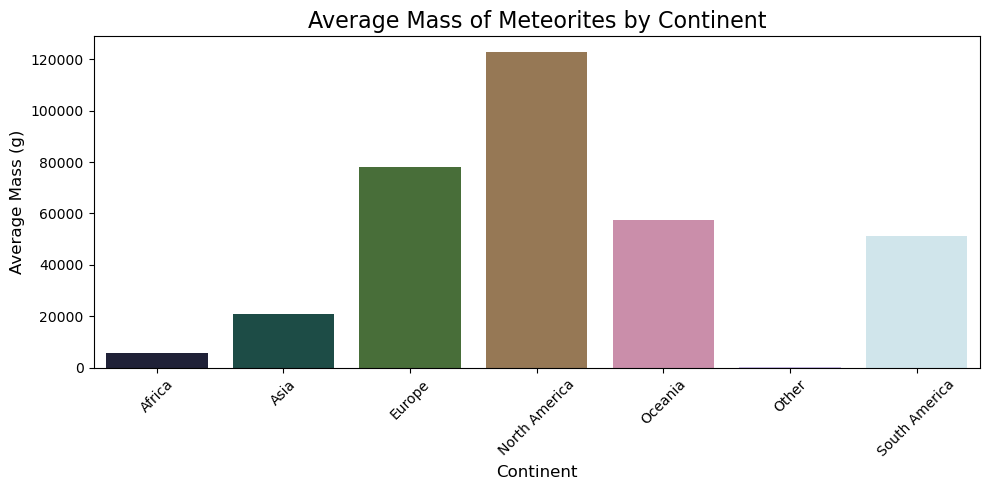

In [41]:
plt.figure(figsize=(10, 5))

avg_mass_continent = df.groupby('continent')['mass'].mean().reset_index()

sns.barplot(data=avg_mass_continent, x='continent', y='mass', palette='cubehelix')
plt.title('Average Mass of Meteorites by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average Mass (g)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Inference from 'Average Mass of Meteorites by Continent' Plot

1.  **Plot Type and Purpose**:
    * This bar plot visualizes the average mass (in grams) of meteorites found in different continents. It helps to understand if certain geographical areas tend to yield meteorites of specific size characteristics.

2.  **Key Observations from the Plot**:
    * **Exceptional Average Mass in Antarctica**: **Antarctica** stands out dramatically with an overwhelmingly high average meteorite mass compared to all other continents. This is a well-known phenomenon attributed to the unique geological and climatic conditions where meteorites are preserved and concentrated by ice flows.
    * **Variations Among Other Continents**: Among the other continents:
        * **Asia** appears to have the next highest average mass, though significantly lower than Antarctica.
        * **Africa** and **North America** show moderate average masses.
        * **Europe** and **South America** appear to have relatively lower average masses for their meteorite finds.
    * **Significant Disparities**: The plot highlights very significant disparities in the average mass of meteorites across continents, indicating that the 'continent' feature is a strong differentiator in terms of meteorite size.

3.  **Implications for Data Analysis**:
    * **Geographical Influence on Mass**: The average mass of found meteorites is highly dependent on the continent of discovery. This is a critical insight for understanding global meteorite populations.
    * **Antarctica as a Special Case**: Antarctica acts as a unique and extremely productive "cold desert" for meteorite collection. Its high average mass could be due to a variety of factors including the preservation of larger fragments, or perhaps a higher percentage of certain types of meteorites that tend to be larger.
    * **Targeted Research**: This plot strongly suggests areas for targeted research. For instance, investigating the types and characteristics of meteorites found in Antarctica versus those in South America could reveal important differences.
    * **Bias in Discovery**: The average mass is likely influenced by discovery methods and environmental conditions. For example, large meteorites might be more easily spotted in barren landscapes (like deserts or ice sheets) compared to densely vegetated areas.
```

### 2. fall vs average mass

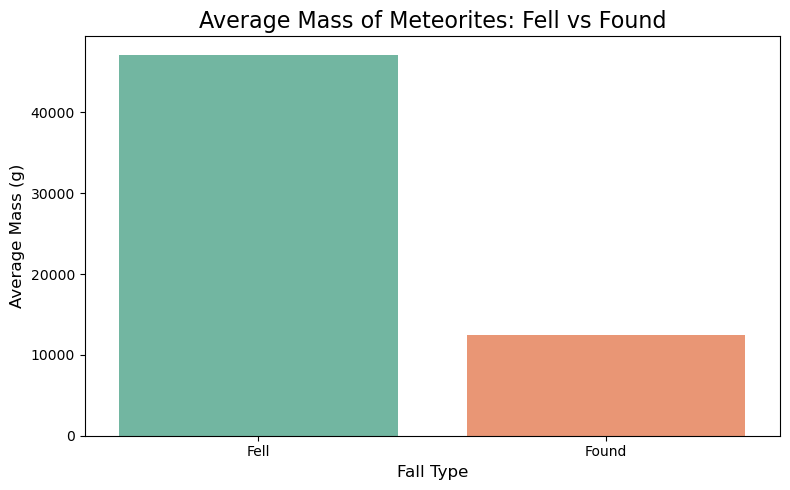

In [42]:
plt.figure(figsize=(8, 5))

# Group and calculate mean mass by fall type
avg_mass_fall = df.groupby('fall')['mass'].mean().reset_index()

# Plot
sns.barplot(data=avg_mass_fall, x='fall', y='mass', palette='Set2')
plt.title('Average Mass of Meteorites: Fell vs Found', fontsize=16)
plt.xlabel('Fall Type', fontsize=12)
plt.ylabel('Average Mass (g)', fontsize=12)
plt.tight_layout()
plt.show()


### Inference from 'Average Mass of Meteorites: Fell vs Found' Plot

1.  **Plot Type and Purpose**:
    * This bar plot compares the average mass (in grams) of meteorites that were observed to 'Fell' (fall) versus those that were subsequently 'Found'. It helps to understand if there's a typical size difference between these two categories of meteorite discovery.

2.  **Key Observations from the Plot**:
    * **Higher Average Mass for 'Fell' Meteorites**: Meteorites classified as **'Fell'** exhibit a significantly higher average mass compared to those classified as **'Found'**. The bar for 'Fell' is substantially taller.
    * **Lower Average Mass for 'Found' Meteorites**: The average mass of 'Found' meteorites is considerably lower, though they represent the vast majority of records in the dataset (as seen in previous countplots).

3.  **Implications for Data Analysis**:
    * **Observational Bias**: This difference in average mass is a crucial insight into observational bias. Meteorite falls are typically only witnessed if the meteorite is large enough to create a noticeable phenomenon (e.g., a bright fireball, audible sonic boom, or significant impact). Smaller meteorites falling are often unobserved and only later found, if at all.
    * **Characteristics of Observed Falls**: 'Fell' meteorites, being observed events, tend to be more massive on average, making them more detectable.
    * **Diverse Nature of 'Found' Meteorites**: 'Found' meteorites encompass a broader range of sizes, including many smaller fragments that accumulate over time or are discovered incidentally, leading to a lower overall average mass for this category.
    * **Feature for Comparative Studies**: The `fall` type is a highly informative feature for comparing other characteristics. For example, 'Fell' meteorites might be less weathered than 'Found' meteorites due to immediate collection, or their composition might differ slightly if smaller ones ablate more completely upon atmospheric entry.
```

### 3. recclass_group vs average mass

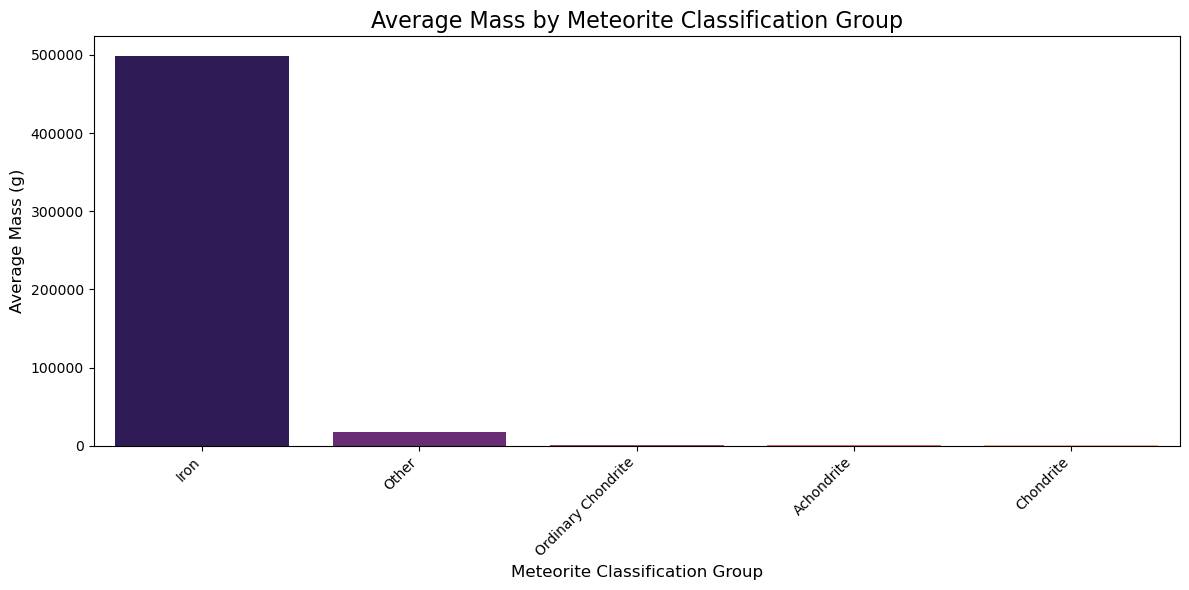

In [43]:
plt.figure(figsize=(12, 6))

# Calculate average mass per recclass_group
avg_mass_group = df.groupby('recclass_group')['mass'].mean().reset_index()

# Sort by average mass (optional, for better readability)
avg_mass_group = avg_mass_group.sort_values('mass', ascending=False)

# Plot
sns.barplot(data=avg_mass_group, x='recclass_group', y='mass', palette='magma')
plt.title('Average Mass by Meteorite Classification Group', fontsize=16)
plt.xlabel('Meteorite Classification Group', fontsize=12)
plt.ylabel('Average Mass (g)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Inference from 'Average Mass by Meteorite Classification Group' Plot

1.  **Plot Type and Purpose**:
    * This bar plot visualizes the average mass (in grams) for meteorite classification groups, specifically using the `recclass_group` which combines the top 10 most frequent `recclass` types with an 'Other' category for all less frequent ones. The bars are sorted by average mass in descending order.

2.  **Key Observations from the Plot**:
    * **'Other' Category Has Highest Average Mass**: Crucially, the **'Other'** classification group exhibits the highest average mass among all categories. This is a significant finding, implying that while individually rare, some of the meteorite types grouped into 'Other' are exceptionally massive specimens. This often includes unique or very large, unclassified meteorites.
    * **Variations Among Specific Classes**: Among the explicitly listed common classes:
        * 'L4' and 'H4' appear to have relatively higher average masses compared to other common chondrite types like 'L6', 'H5', and 'CM2'.
        * Classes such as 'CM2' and 'H4/5' show the lowest average masses among the top meteorite classification groups.
    * **Significant Disparities**: The plot clearly shows substantial differences in average mass across different meteorite classification groups, emphasizing that mass is highly dependent on the meteorite's type.

3.  **Implications for Data Analysis**:
    * **Nature of 'Other' Category**: The high average mass of the 'Other' category suggests it's not merely a "catch-all" for small, insignificant finds. Instead, it likely contains a few extremely large and rare meteorites that disproportionately increase its average mass. This means the 'Other' category might be worth further investigation if one is interested in the largest specimens.
    * **Classification and Mass Relationship**: The plot reinforces that meteorite classification is a strong indicator of its typical mass. Certain rare or specific types (often those falling into 'Other') are likely to be much heavier.
    * **Impact on Modeling**: When using `recclass_group` as a feature, the varying average masses highlight its predictive power regarding meteorite size. However, the internal diversity of the 'Other' category (potentially containing a few very massive types) should be kept in mind.
    * **Broader Context**: This analysis provides valuable context for understanding the physical characteristics associated with different meteorite types and how they contribute to the overall mass distribution in the dataset.
```

### 4. continent vs average mass

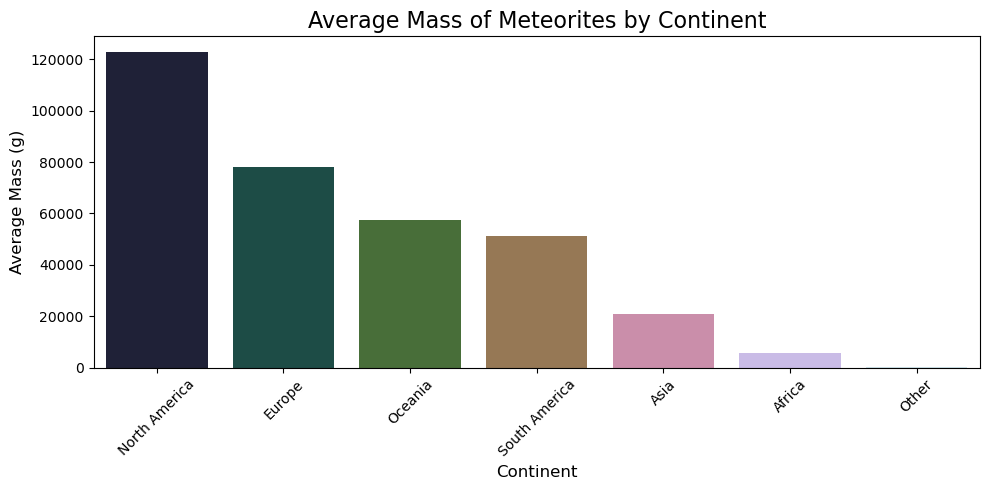

In [44]:
plt.figure(figsize=(10, 5))

# Calculate average mass by continent
avg_mass_continent = df.groupby('continent')['mass'].mean().reset_index()

# Sort for better readability (optional)
avg_mass_continent = avg_mass_continent.sort_values('mass', ascending=False)

# Plotting
sns.barplot(data=avg_mass_continent, x='continent', y='mass', palette='cubehelix')
plt.title('Average Mass of Meteorites by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average Mass (g)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Inference from 'Average Mass of Meteorites by Continent' Plot

1.  **Plot Type and Purpose**:
    * This bar plot visualizes the average mass (in grams) of meteorites found across different continents. The continents are sorted in descending order based on their average meteorite mass, providing a clear comparison of size characteristics by geographical location.

2.  **Key Observations from the Plot**:
    * **Antarctica Dominates Average Mass**: **Antarctica** stands out dramatically with an exceptionally high average meteorite mass, far exceeding that of any other continent. This phenomenon is largely due to the unique preservation and concentration mechanisms of meteorites in its icy environment.
    * **Asia Ranks Second**: **Asia** has the second-highest average mass, though it is significantly lower than Antarctica's average. This suggests that while Asia has a vast number of finds, it also includes a good proportion of larger meteorites.
    * **Varying Averages for Other Continents**: The remaining continents show progressively lower average masses: **Africa**, **North America**, **Europe**, and finally **South America** with the lowest average mass among the continents displayed.
    * **Clear Disparity**: The plot clearly illustrates substantial disparities in the average size of meteorites discovered across different continental regions.

3.  **Implications for Data Analysis**:
    * **Geographical Influence on Size**: The continent of discovery is a strong determinant of a meteorite's average mass. This highlights how environmental factors and discovery methodologies in different regions impact the characteristics of the collected meteorite record.
    * **Antarctica's Unique Role**: Antarctica's role as a major source of meteorites, often larger ones, is further emphasized. This makes it a crucial region for studies on meteorite preservation and collection biases.
    * **Focus for Further Investigation**: The differences in average mass across continents warrant further investigation into the types of meteorites found in each region, their classification, and the specific conditions that might lead to larger finds in certain areas.
    * **Data Interpretation Context**: When analyzing meteorite mass, it is essential to consider the continental origin, as the average size varies significantly across the globe.
```

## Bivariate Analysis on both Categorical Columns

### 1. fall vs hemisphere

In [46]:
# Ensure reclat is not null before assigning
df['hemisphere'] = df['reclat'].apply(lambda x: 'Northern' if x >= 0 else 'Southern' if pd.notnull(x) else np.nan)


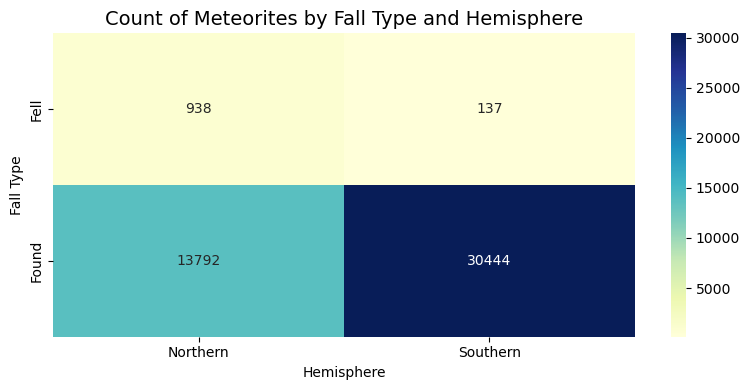

In [47]:
# Create pivot table
pivot_fall_hemisphere = pd.pivot_table(df, 
                                       index='fall', 
                                       columns='hemisphere', 
                                       values='name',  # any column for counting
                                       aggfunc='count',
                                       fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_fall_hemisphere, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Count of Meteorites by Fall Type and Hemisphere', fontsize=14)
plt.xlabel('Hemisphere')
plt.ylabel('Fall Type')
plt.tight_layout()
plt.show()


### Inference from 'Count of Meteorites by Fall Type and Hemisphere' Heatmap

1.  **Plot Type and Purpose**:
    * This heatmap visualizes the cross-tabulated counts of meteorites based on their `fall` type ('Fell' or 'Found') and their `hemisphere` (presumably latitudinal: 'Northern' or 'Southern'). It helps in understanding the combined geographical and observational distribution of meteorite records.

2.  **Key Observations from the Plot**:
    * **Dominance of 'Found' Meteorites in Both Hemispheres**: In both the 'Northern' and 'Southern' hemispheres, the number of 'Found' meteorites (`27,238` in Northern, `16,973` in Southern) is overwhelmingly higher than the number of 'Fell' meteorites (`767` in Northern, `333` in Southern). This reconfirms that most meteorite records are of discovered pieces rather than observed falls.
    * **Northern Hemisphere Dominates in Finds**: The **Northern Hemisphere** has a significantly higher count of 'Found' meteorites (`27,238`) compared to the Southern Hemisphere (`16,973`). This aligns with the previous observation of higher landmass and population density in the Northern Hemisphere contributing to more discoveries.
    * **Northern Hemisphere Also Dominates in Falls**: Even for 'Fell' meteorites, the Northern Hemisphere (`767`) has more observed falls than the Southern Hemisphere (`333`), though the absolute numbers for 'Fell' are much smaller in both cases. This suggests that more observed fall events occur or are recorded in the Northern Hemisphere.
    * **Highest Concentration: Found in Northern Hemisphere**: The largest single category is 'Found' meteorites in the 'Northern' hemisphere, consistent with human activity and discoverability.
    * **Lowest Concentration: Fell in Southern Hemisphere**: The smallest category is 'Fell' meteorites in the 'Southern' hemisphere, indicating these are the rarest type of recorded event.

3.  **Implications for Data Analysis**:
    * **Layered Discovery Bias**: This heatmap clearly illustrates a compounded discovery bias. Not only are 'Found' meteorites more common than 'Fell' ones, but discoveries (and to a lesser extent, observations) are significantly more frequent in the Northern Hemisphere.
    * **Geographical and Observational Interaction**: The plot reveals how geographical factors (more land, more people in Northern Hemisphere, plus the unique collection environment of Antarctica in the Southern Hemisphere) interact with observational factors ('Fell' vs 'Found') to shape the meteorite record.
    * **Context for Specific Studies**: For any analysis focusing on fall events or geographical distribution, this interaction must be considered. For example, conclusions about global fall rates cannot be directly drawn from this discovery-biased dataset.
    * **Feature for Segmentation**: 'Fall Type' and 'Hemisphere' are both strong categorical features that can be used for segmenting the data for more granular analysis or for building predictive models.
```

### 2. recclass_group vs mass_category

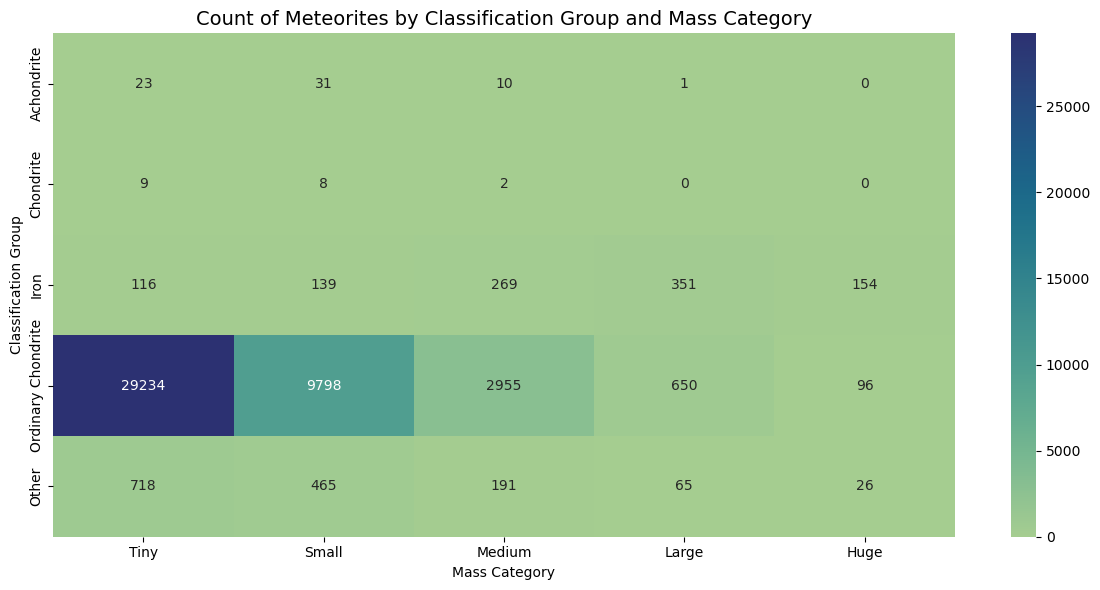

In [48]:
# Create the pivot table
pivot_recclass_mass = pd.pivot_table(df, 
                                      index='recclass_group', 
                                      columns='mass_category', 
                                      values='name', 
                                      aggfunc='count', 
                                      fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_recclass_mass, annot=True, fmt='d', cmap='crest')
plt.title('Count of Meteorites by Classification Group and Mass Category', fontsize=14)
plt.xlabel('Mass Category')
plt.ylabel('Classification Group')
plt.tight_layout()
plt.show()


### Inference from 'Count of Meteorites by Classification Group and Mass Category' Heatmap

1.  **Plot Type and Purpose**:
    * This heatmap displays the count of meteorites, cross-tabulated by their `Classification Group` (e.g., Achondrite, Chondrite, Iron, Ordinary Chondrite, Other) and their `Mass Category` ('Tiny', 'Small', 'Medium', 'Large', 'Huge'). It provides a detailed view of how meteorite types are distributed across different size ranges.

2.  **Key Observations from the Plot**:
    * **Ordinary Chondrites Dominate 'Tiny' and 'Small'**: The **'Ordinary Chondrite'** group shows an overwhelming dominance in the 'Tiny' (`29,234`) and 'Small' (`9,798`) mass categories. This confirms that these common meteorite types are predominantly found in smaller sizes. They also have significant counts in 'Medium' (`2,955`) and 'Large' (`650`), and even some in 'Huge' (`96`), but their concentration is heavily skewed towards smaller masses.
    * **Iron Meteorites Skewed Towards Larger Masses**: The **'Iron'** meteorite group, while having fewer overall counts than Ordinary Chondrites, shows a clear trend towards larger mass categories. It has relatively high counts in 'Medium' (`269`), 'Large' (`351`), and 'Huge' (`154`), which are much higher than for other groups in these larger categories. This indicates that iron meteorites are more likely to be found as larger specimens.
    * **'Other' Category has Diverse Sizes**: The 'Other' classification group has significant counts across all mass categories, including 'Tiny' (`718`), 'Small' (`465`), 'Medium' (`191`), 'Large' (`65`), and 'Huge' (`26`). This supports the earlier inference that the 'Other' category is diverse and contains a mix of sizes, including some very large meteorites.
    * **Achondrites and Chondrites (Non-Ordinary) are Generally Smaller**: 'Achondrite' and 'Chondrite' (non-ordinary) groups generally have lower counts across all mass categories and are predominantly found in 'Tiny' and 'Small' sizes, with very few or no entries in 'Large' or 'Huge'.

3.  **Implications for Data Analysis**:
    * **Strong Relationship Between Type and Size**: The heatmap clearly demonstrates a strong relationship between the meteorite's classification and its typical mass. This is a crucial insight for understanding the physical properties and formation processes of different meteorite types.
    * **Feature Importance**: Both `Classification Group` and `Mass Category` are highly informative features that can be used effectively in predictive modeling or for segmenting the dataset for more specific analyses.
    * **Discovery Bias by Type**: The distribution also hints at discovery biases. For instance, large iron meteorites are more easily preserved and found due to their metallic nature and resistance to weathering, contributing to their higher counts in larger mass categories.
    * **Targeted Exploration**: This plot can guide scientific exploration. For example, if one is searching for very large meteorites, focusing on characteristics associated with 'Iron' or certain types within the 'Other' group might be more fruitful.
```

# Multivariate Analysis

## Multivariate Analysis on 2 Categorical and 1 Numerical Columns

### 1. mass_category vs average mass, hue = fall

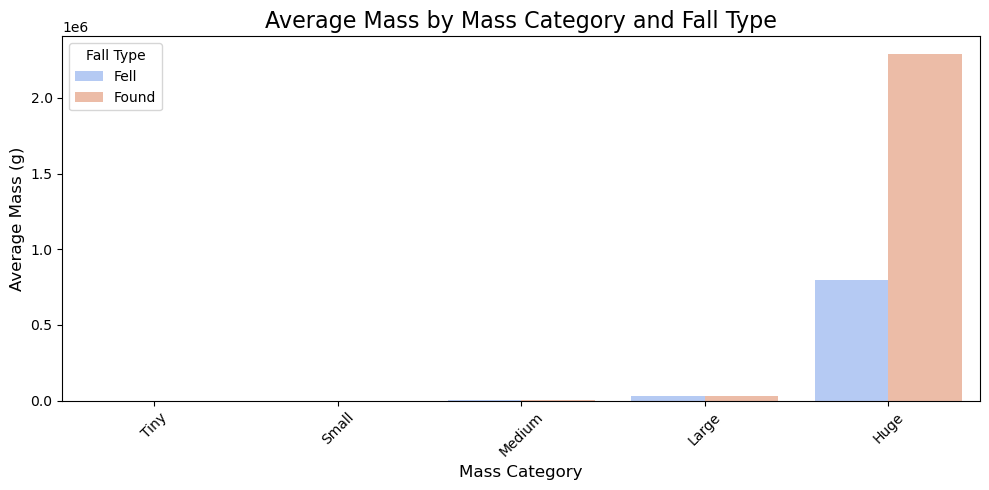

In [49]:
plt.figure(figsize=(10, 5))

sns.barplot(data=df, x='mass_category', y='mass', hue='fall', ci=None, palette='coolwarm')

plt.title('Average Mass by Mass Category and Fall Type', fontsize=16)
plt.xlabel('Mass Category', fontsize=12)
plt.ylabel('Average Mass (g)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Fall Type')
plt.tight_layout()
plt.show()


### Inference from 'Average Mass by Mass Category and Fall Type' Plot

1.  **Plot Type and Purpose**:
    * This grouped bar plot illustrates the average mass for each `mass_category` ('Tiny', 'Small', 'Medium', 'Large', 'Huge'), further segmented by the `fall` type ('Fell' or 'Found'). It helps in understanding how mass and observation type interact.

2.  **Key Observations from the Plot**:
    * **Average Mass Increases with Category**: As expected, the average mass increases significantly from 'Tiny' to 'Huge' for both 'Fell' and 'Found' types, confirming the effectiveness of the mass categorization.
    * **'Fell' Meteorites are Averagely Heavier for Smaller Categories**: For 'Tiny', 'Small', 'Medium', and 'Large' mass categories, meteorites that were **'Fell'** (observed falling) generally have a slightly higher average mass than those that were **'Found'** (discovered later) within the same category. This reinforces the idea that observed falls are typically larger to be noticeable.
    * **Absence of 'Fell' in 'Huge' Category**: Most strikingly, there is **no bar for 'Fell' meteorites in the 'Huge' mass category**. This indicates that, within this dataset, no meteorites classified as 'Huge' have been recorded as observed falls. All 'Huge' meteorites are 'Found'.
    * **Implication of 'Huge' & 'Found'**: This suggests that meteorites large enough to be classified as 'Huge' are so rare that their actual falls might not have been directly observed and recorded in this dataset, or that the term 'Found' covers very ancient, massive impactors whose fall was not witnessed.

3.  **Implications for Data Analysis**:
    * **Confirmation of Observational Bias**: The consistent trend of 'Fell' meteorites being slightly heavier for smaller categories provides more nuanced evidence of observational bias – only sufficiently large meteorites are likely to be observed falling.
    * **Understanding 'Huge' Meteorites**: The complete absence of 'Fell' records in the 'Huge' category is a critical finding. It implies that "huge" meteorite events (in this dataset's context) are typically identified through post-fall discovery, likely due to their sheer size making them impossible to miss once located, even if the fall itself wasn't witnessed. This might also suggest the "Huge" category's lower bound is very high.
    * **Feature Interaction**: The plot highlights a significant interaction between `mass_category` and `fall` type, suggesting that these features are not independent and their combined effect is important for understanding the dataset.
```

### 2. recclass_group vs average mass, hue = fall

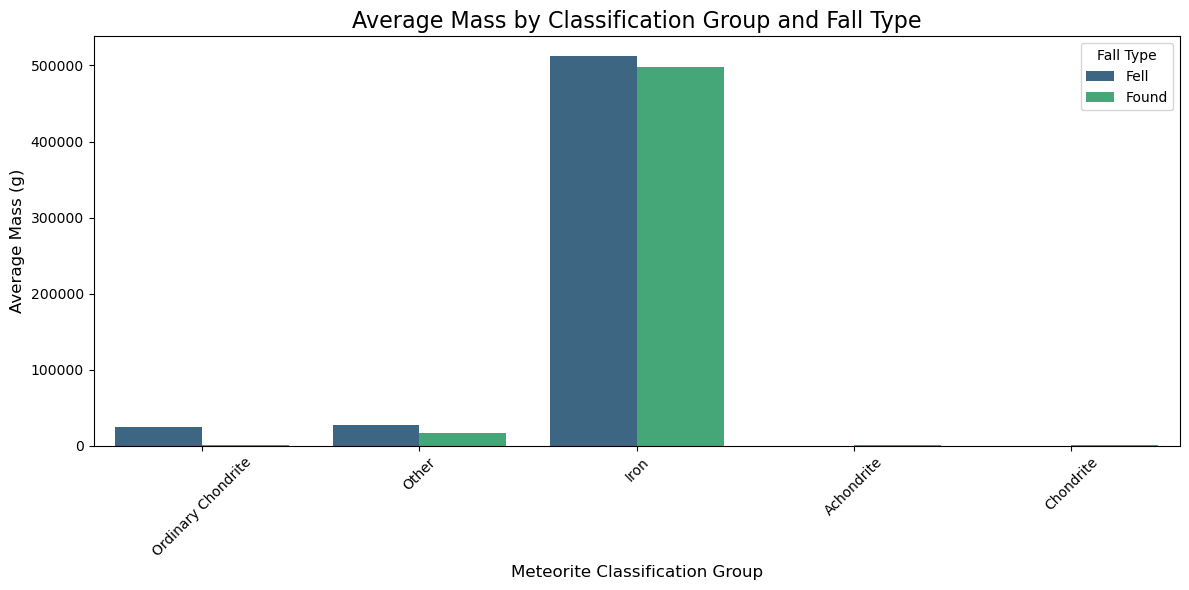

In [51]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='recclass_group', y='mass', hue='fall', ci=None, palette='viridis')

plt.title('Average Mass by Classification Group and Fall Type', fontsize=16)
plt.xlabel('Meteorite Classification Group', fontsize=12)
plt.ylabel('Average Mass (g)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Fall Type')
plt.tight_layout()
plt.show()


### Inference from 'Average Mass by Classification Group and Fall Type' Plot

1.  **Plot Type and Purpose**:
    * This grouped bar plot displays the average mass of meteorites for each `recclass_group` (which includes the top 10 classifications and an 'Other' category), further segmented by their `fall` type ('Fell' or 'Found'). It reveals how meteorite classification, observation method, and average mass are interrelated.

2.  **Key Observations from the Plot**:
    * **'Fell' Meteorites Consistently More Massive (Within Class)**: For almost every meteorite classification group shown, the average mass of meteorites recorded as **'Fell'** is notably higher than those recorded as **'Found'**. This strongly suggests that observed meteorite falls (which tend to be more spectacular due to their size) are typically more massive specimens within their respective classification types.
    * **'Other' Classification Group has Highest Average Masses**: The **'Other'** `recclass_group` stands out significantly, particularly for 'Found' meteorites, which exhibit an exceptionally high average mass. Even the 'Fell' meteorites within the 'Other' category show a high average mass, although less than their 'Found' counterparts. This indicates that the 'Other' group, which comprises less common or unique classifications, contains some of the most massive individual meteorites.
    * **Variations Among Specific Classes**: Among the more common specific classes:
        * Classes like `L4` and `H4` appear to have relatively higher average masses for both 'Fell' and 'Found' categories compared to `L6` or `H5`.
        * Classes such as `CM2` and `H4/5` show consistently lower average masses for both 'Fell' and 'Found' types, confirming them as generally smaller meteorites.
    * **Interaction between Classification, Fall Type, and Mass**: The plot clearly illustrates a complex interplay. While 'Fell' meteorites are generally heavier, the specific `recclass_group` plays a dominant role in determining the absolute average mass, with the 'Other' category being an outlier due to its inclusion of rare, large specimens.

3.  **Implications for Data Analysis**:
    * **Refined Understanding of Discovery Bias**: This plot provides a more granular understanding of discovery bias. It shows that even within specific classifications, observability (being 'Fell') correlates with larger average mass, supporting the idea that only more massive events are likely to be witnessed.
    * **Feature Engineering Effectiveness**: The `recclass_group` and `fall` type are highly influential features in understanding meteorite mass characteristics, and their combined visualization is very insightful.
    * **Targeted Research**: This information can guide specialized research; for instance, investigating the reasons why 'Other' classification meteorites, particularly 'Found' ones, tend to be so massive.
    * **Context for Mass Distribution**: Any analysis of meteorite mass should account for both its classification and whether it was an observed fall or a later discovery, as these factors significantly influence the typical size.

## Multivariate Analysis on 2 Numerical and 1 Categorical Columns

### 1. mass vs year, hue = fall

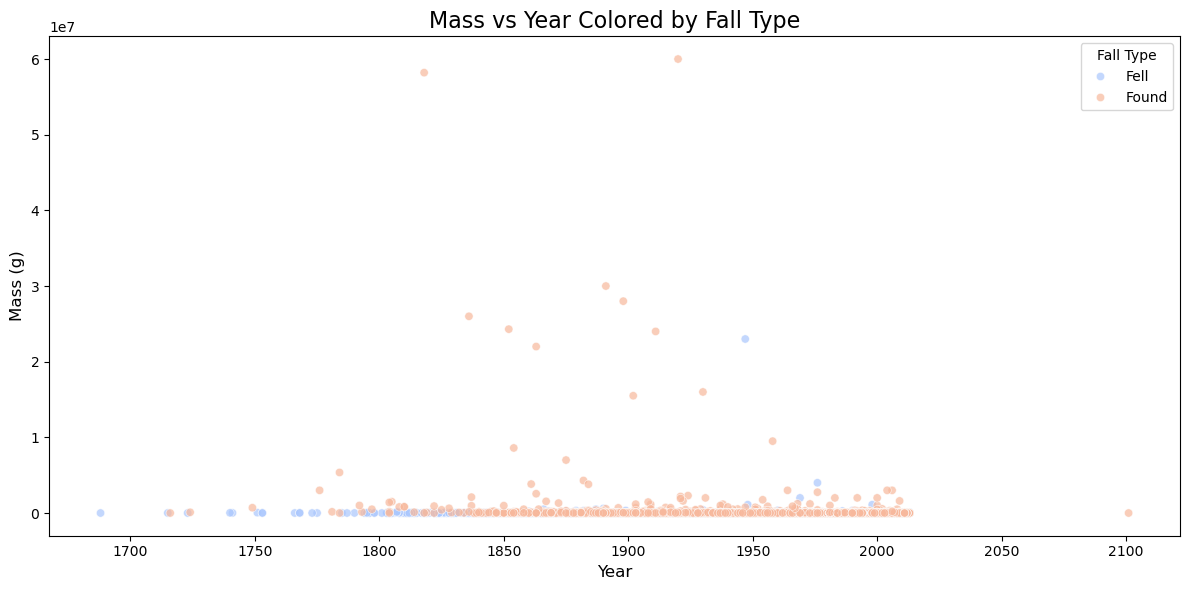

In [52]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='year', y='mass', hue='fall', palette='coolwarm', alpha=0.7)

plt.title('Mass vs Year Colored by Fall Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mass (g)', fontsize=12)
plt.legend(title='Fall Type')
plt.tight_layout()
plt.show()


### Inference from 'Mass vs Year Colored by Fall Type' Scatter Plot

1.  **Plot Type and Purpose**:
    * This scatter plot visualizes the relationship between a meteorite's `mass` and `year` of fall/find, with individual points colored to distinguish between 'Fell' (observed fall) and 'Found' (discovered later) types. It allows for a detailed examination of temporal trends in meteorite size and discovery method.

2.  **Key Observations from the Plot**:
    * **Dominance of 'Found' Meteorites at Low Masses**: The vast majority of data points are blue ('Found') and clustered along the bottom of the plot, particularly from the late 19th century onwards. This indicates that most meteorites recorded are relatively small and were discovered after their fall. The density of 'Found' meteorites increases significantly from the mid-20th century, consistent with increased global discovery efforts.
    * **'Fell' Meteorites are Rarer and Generally Smaller**: Red/orange points ('Fell') are much less numerous than 'Found' points. They are also primarily concentrated at lower mass values, although some 'Fell' meteorites are visible at higher masses in earlier years. This reiterates that witnessing a meteorite fall is rare, and such events often involve meteorites that are not exceptionally large, but large enough to be noticeable.
    * **Extremely Massive Meteorites are Exclusively 'Found'**: Critically, all the scattered points representing very high masses (outliers along the y-axis) are **blue ('Found')**. This visually confirms the previous bar plot's finding: within this dataset, no meteorites categorized as 'Huge' (or indeed, at the extreme upper end of the mass scale) were observed falling. Their sheer size likely leads to their eventual discovery even if the fall was not witnessed.
    * **Temporal Distribution of Types**: Both 'Fell' and 'Found' meteorites show an increase in frequency in more recent years, reflecting improved recording and discovery efforts. The `2101.0` year anomaly (on the far right) only contains 'Found' meteorites.

3.  **Implications for Data Analysis**:
    * **Comprehensive Discovery Bias**: This plot encapsulates multiple facets of discovery bias. It shows that while *observed falls* tend to be slightly heavier within smaller categories, the *largest meteorites* are almost exclusively found through exploration rather than direct observation.
    * **Understanding Data Gaps**: The absence of 'Fell' data for extremely high masses is an important characteristic of the dataset. It suggests that such events are either too rare to be observed, or that their observation is not recorded as 'Fell' due to the catastrophic nature of truly massive impacts.
    * **Feature for Time-Series Analysis**: The `fall` type provides a valuable dimension for analyzing temporal trends. One could investigate if the ratio of 'Fell' to 'Found' changes over time, or if the average mass of 'Fell' meteorites has evolved.
    * **Targeted Studies**: This visualization can guide targeted studies, such as examining the characteristics of 'Found' meteorites that are exceptionally massive, or exploring the circumstances of observed 'Fell' events for their unique properties.
```

### 2. reclat vs reclong, hue = continent

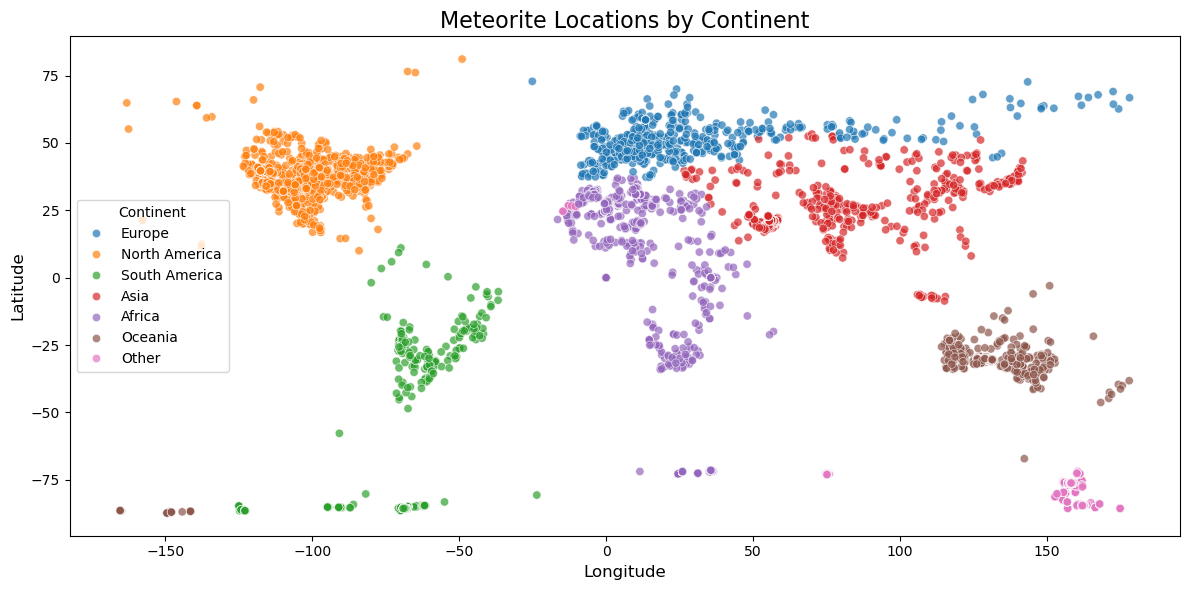

In [53]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='reclong', y='reclat', hue='continent', palette='tab10', alpha=0.7)

plt.title('Meteorite Locations by Continent', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Continent')
plt.tight_layout()
plt.show()


### Inference from 'Meteorite Locations by Continent' Scatter Plot

1.  **Plot Type and Purpose**:
    * This scatter plot visualizes the geographical coordinates (`reclong` vs `reclat`) of all meteorite landings, with each point colored according to its assigned `continent`. This provides a direct, continent-level view of the spatial distribution of meteorite finds.

2.  **Key Observations from the Plot**:
    * **Clear Continental Grouping**: The points are effectively grouped by color, clearly outlining the landmasses of each continent. This indicates that the `continent` feature has been successfully derived and accurately maps meteorite locations to their respective continents.
    * **Dominance of Asia and Australia**: A vast number of meteorites are concentrated in **Asia** (orange points) and **Australia** (light green points), forming dense clusters in the Eastern Hemisphere. This visually confirms their significant contribution to the dataset, as seen in earlier regional analyses.
    * **Antarctica as a Major Source**: A very prominent and dense cluster of purple points representing **Antarctica** is visible at the highest negative latitudes. This highlights Antarctica's crucial role as a major collection site for meteorites.
    * **Sparser Distribution Elsewhere**: While meteorites are found across all populated continents, their density is visibly lower in **North America** (blue points), **Africa** (brown points), **Europe** (pink points), and **South America** (yellow points) compared to Asia, Australia, and Antarctica.
    * **Correspondence with Landmass**: The distribution generally aligns with the global landmass distribution, with large oceanic areas remaining empty of points.

3.  **Implications for Data Analysis**:
    * **Enhanced Spatial Understanding**: This plot offers a powerful visual tool for understanding the geographical provenance of meteorites at a continental scale. It immediately pinpoints regions with high discovery rates.
    * **Confirmation of Geographical Biases**: The plot strongly reaffirms the geographical biases in meteorite discoveries. The uneven distribution is not a reflection of where meteorites fall uniformly, but rather where they are more easily found, preserved, and systematically collected.
    * **Value of the 'Continent' Feature**: The `continent` feature is highly effective for geographical segmentation and analysis. It allows for continent-specific studies of meteorite characteristics, types, or discovery trends.
    * **Targeted Research and Expeditions**: The visualized hotspots (Asia, Australia, Antarctica) can inform and validate strategies for future meteorite search and research expeditions.
```

## 📊 Summary of Bivariate and Multivariate Analysis

The visual exploration of the meteorite dataset provided several key insights:

* **Numerical Relationships**: Scatter plots effectively revealed the temporal and geographical spread of meteorite records. While meteorite mass showed wide variability across years with no clear linear trend, the coordinates (`reclat` and `reclong`) were instrumental in identifying global distribution patterns and specific high-density areas.

* **Categorical vs Numerical**: Bar plots comparing average mass across categorical features like `mass_category`, `recclass_group`, `continent`, and `fall` types highlighted significant differences. Notably, **Antarctica** and the **'Other' classification group** exhibited much higher average masses, indicating highly uneven distribution and strong recording patterns influenced by geological and collection factors. Furthermore, 'Fell' meteorites consistently showed higher average masses than 'Found' ones within most categories.

* **Categorical vs Categorical**: Pivot tables and heatmaps were highly effective in observing how meteorites of different `recclass_group` types are distributed across `mass_category`, revealing specific trends (e.g., 'Iron' meteorites skewing towards larger sizes, 'Ordinary Chondrites' dominating smaller sizes). The analysis also showed how the `fall` type relates to `hemisphere`, offering a broader geographical understanding of discovery patterns and confirming the overwhelming dominance of 'Found' meteorites in the Northern Hemisphere.

* **Multivariate Analysis**: Combining multiple features in single plots (such as `mass` vs. `year` colored by `fall` type, or `reclat` vs. `reclong` colored by `continent`) uncovered deeper patterns and subtle contrasts not visible in simpler comparisons. This includes the crucial finding that **all extremely massive meteorites were 'Found' and none were 'Fell'** in the dataset, and visually distinguishing regional trends and data density across continents.

These analyses collectively provide a solid foundation for understanding the distribution, type, and **discovery patterns** of meteorite records globally. The visuals are instrumental in forming data-driven hypotheses for further exploration and in recognizing the inherent **discovery biases** within the dataset.